In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv('weatherAUS.csv')
pd.set_option("display.max_columns", None)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(145460, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
numerical_feature = [column for column in df.columns if df[column].dtypes != 'O']
discrete_feature = [column for column in numerical_feature if len(df[column].unique())<25]
continuous_feature = [column for column in numerical_feature if column not in discrete_feature]
categorical_feature = [column for column in df.columns if column not in numerical_feature]

In [9]:
print("Numerical Feature Count : {}".format(len(numerical_feature)))
print("Discrete Feature Count : {}".format(len(discrete_feature)))
print("Continuous Feature Count : {}".format(len(continuous_feature)))
print("Categorical Feature Count : {}".format(len(categorical_feature)))

Numerical Feature Count : 16
Discrete Feature Count : 2
Continuous Feature Count : 14
Categorical Feature Count : 7


In [10]:
print(numerical_feature)
print(discrete_feature)
print(continuous_feature)
print(categorical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Cloud9am', 'Cloud3pm']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [12]:
df['Year']=df['Date'].str.split('-').str[0]
df['Month']=df['Date'].str.split('-').str[1]
df['Date']=df['Date'].str.split('-').str[2]

In [13]:
value = ['Year','Month','Date']
df[value]

,Year,Month,Date
0,2008,12,01
1,2008,12,02
2,2008,12,03
3,2008,12,04
4,2008,12,05
...,...,...,...
145455,2017,06,21
145456,2017,06,22
145457,2017,06,23
145458,2017,06,24


In [14]:
df['Year'] = df['Year'].astype(int)
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)

In [15]:
# find a null values of a given column

def isnull_elements(df,variable):
    value_isnull = df[variable].isnull().sum()
    return value_isnull

In [16]:
# find list of unique elements in a column

def find_unique(df,column):
    return df[column].unique()
    

In [17]:
# find the no of unique elements in a column

def count_unique(df,column):
    return df[column].nunique()

In [18]:
total_isnull = ['Cloud9am','Cloud3pm','Evaporation','Sunshine']

In [19]:
isnull_elements(df,total_isnull)

Cloud9am       55888
Cloud3pm       59358
Evaporation    62790
Sunshine       69835
dtype: int64

In [20]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [21]:
location = {'Albury':1, 'BadgerysCreek':2, 'Cobar':3, 'CoffsHarbour':4, 'Moree':5,
       'Newcastle':6, 'NorahHead':7, 'NorfolkIsland':8, 'Penrith':9, 'Richmond':10,
       'Sydney':11, 'SydneyAirport':12, 'WaggaWagga':13, 'Williamtown':14,
       'Wollongong':15, 'Canberra':16, 'Tuggeranong':17, 'MountGinini':18, 'Ballarat':19,
       'Bendigo':20, 'Sale':21, 'MelbourneAirport':22, 'Melbourne':23, 'Mildura':24,
       'Nhil':25, 'Portland':26, 'Watsonia':27, 'Dartmoor':28, 'Brisbane':29, 'Cairns':30,
       'GoldCoast':31, 'Townsville':32, 'Adelaide':33, 'MountGambier':34, 'Nuriootpa':35,
       'Woomera':36, 'Albany':37, 'Witchcliffe':38, 'PearceRAAF':39, 'PerthAirport':40,
       'Perth':41, 'SalmonGums':42, 'Walpole':43, 'Hobart':44, 'Launceston':45,
       'AliceSprings':46, 'Darwin':47, 'Katherine':48, 'Uluru':49}

df["Location"] = df["Location"].map(location)

In [22]:
df["Location"].isnull().sum()

0

In [23]:
df['RainToday'].isnull().sum()

3261

In [24]:
def Dummy_value(df,column_name):
    df[column_name]=pd.get_dummies(df[column_name],drop_first=True)
    return df[column_name]

In [25]:
value = ['RainToday','RainTomorrow']
Dummy_value(df,value)

,RainToday,RainTomorrow
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
145455,False,False
145456,False,False
145457,False,False
145458,False,False


In [26]:
values = {False:0,  True:1}
def Map_value(df,column):
    df[column]=df[column].map(values)
    return df[column]

In [27]:
df['RainToday'].unique()

array([False,  True])

In [28]:
Map_value(df,'RainToday')

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainToday, Length: 145460, dtype: int64

In [29]:
Map_value(df,'RainTomorrow')

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64

In [30]:
def filling_NaN(df,column):
    df[column] = df[column].fillna(df[column].value_counts().index[0])
    return df[column]

In [31]:
filling_NaN(df,'WindGustDir')

0           W
1         WNW
2         WSW
3          NE
4           W
         ... 
145455      E
145456    NNW
145457      N
145458     SE
145459      W
Name: WindGustDir, Length: 145460, dtype: object

In [32]:
filling_NaN(df,'WindDir9am')

0           W
1         NNW
2           W
3          SE
4         ENE
         ... 
145455     SE
145456     SE
145457     SE
145458    SSE
145459    ESE
Name: WindDir9am, Length: 145460, dtype: object

In [33]:
filling_NaN(df,'WindDir3pm')

0         WNW
1         WSW
2         WSW
3           E
4          NW
         ... 
145455    ENE
145456      N
145457    WNW
145458      N
145459    ESE
Name: WindDir3pm, Length: 145460, dtype: object

In [34]:
find_unique(df,'WindDir9am')

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [35]:
winddir9am = {'W':1, 'NNW':2, 'SE':3, 'ENE':4, 'SW':5, 'SSE':6, 'S':7, 'NE':8, 'SSW':9, 'N':10,
       'WSW':11, 'ESE':12, 'E':13, 'NW':14, 'WNW':15, 'NNE':16}

In [36]:
find_unique(df,'WindGustDir')

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [37]:
windgusdir = {'W':1, 'WNW':2, 'WSW':3, 'NE':4, 'NNW':5, 'N':6, 'NNE':7, 'SW':8, 'ENE':9, 'SSE':10,
       'S':11, 'NW':12, 'SE':13, 'ESE':14, 'E':15, 'SSW':16}

In [38]:
find_unique(df,'WindDir3pm')

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [39]:
winddir3pm = {'WNW':1, 'WSW':2, 'E':3, 'NW':4, 'W':5, 'SSE':6, 'ESE':7, 'ENE':8, 'NNW':9, 'SSW':10,
       'SW':11, 'SE':12, 'N':13, 'S':14, 'NNE':15, 'NE':16}

In [40]:
df["WindGustDir"] = df["WindGustDir"].map(windgusdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

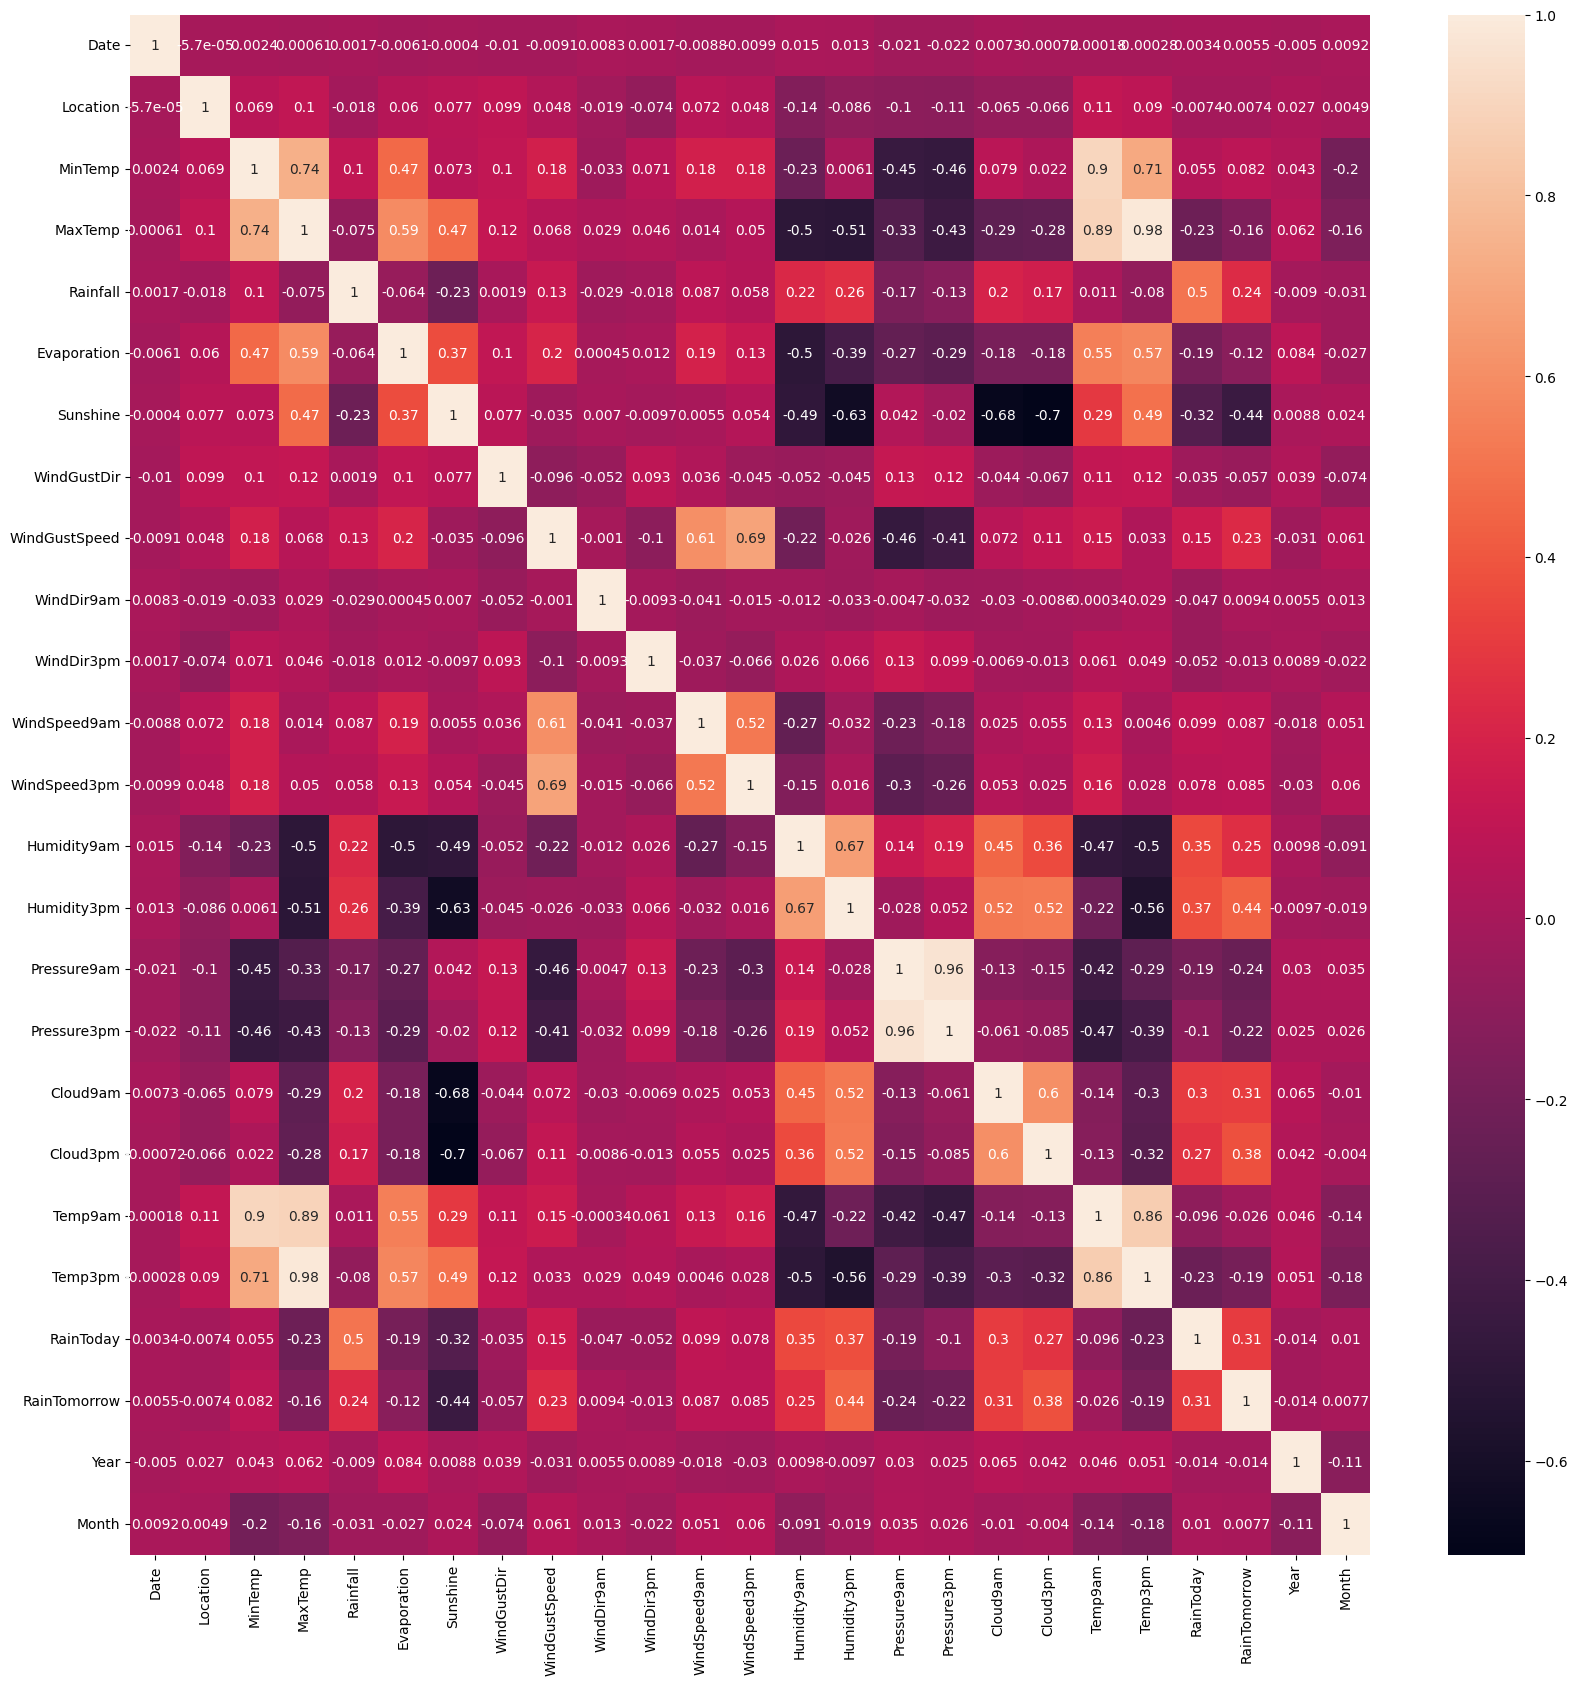

In [41]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


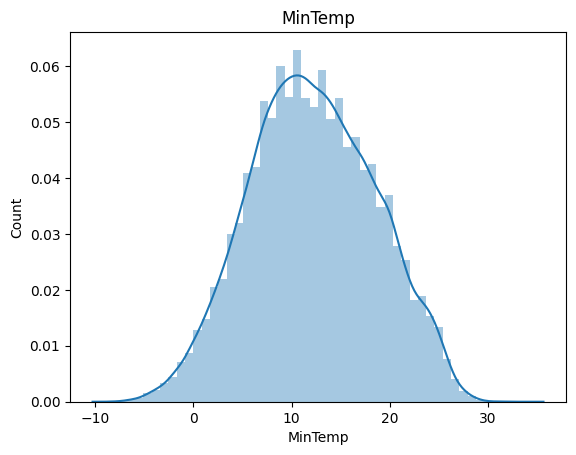

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


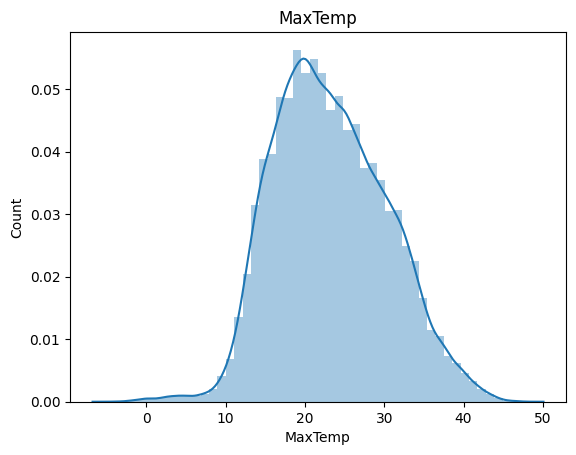

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


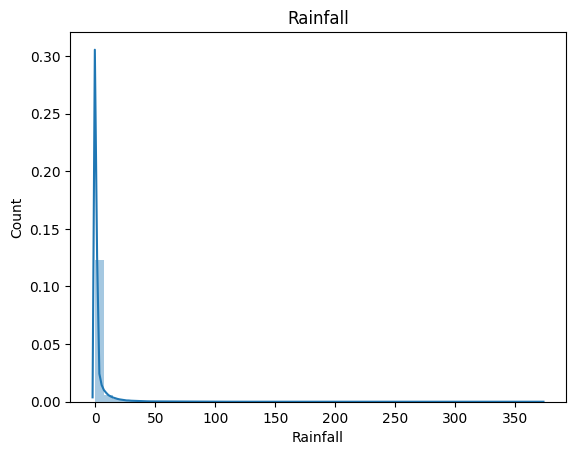

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


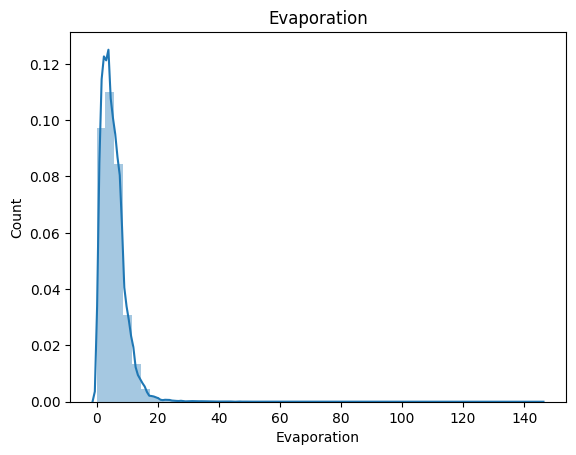

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


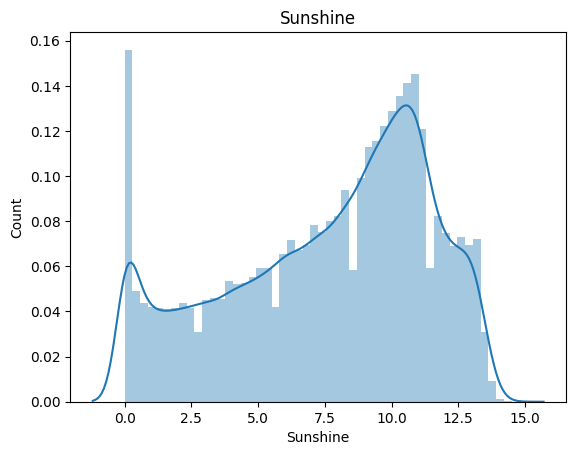

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


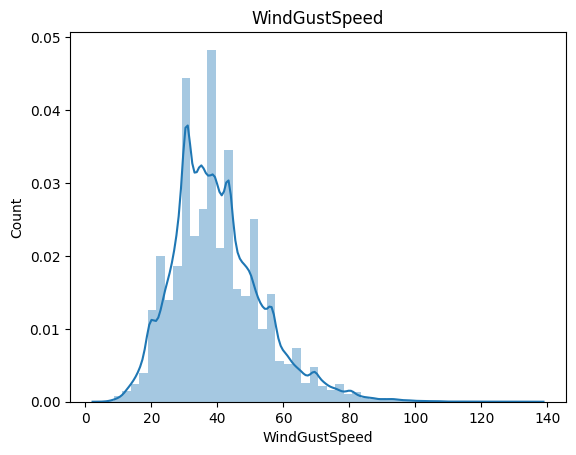

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


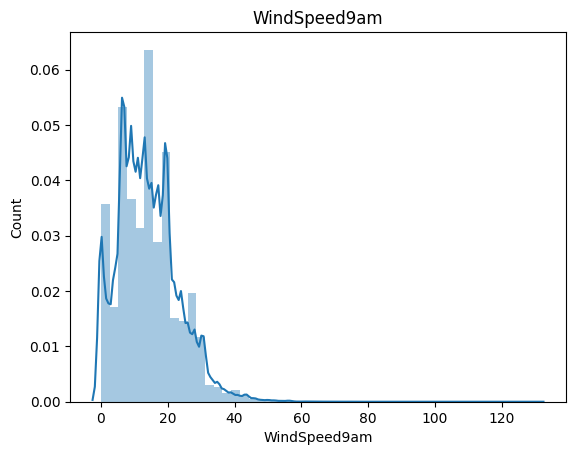

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


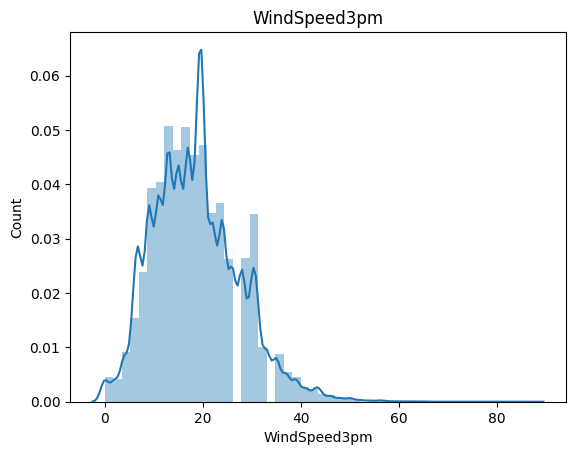

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


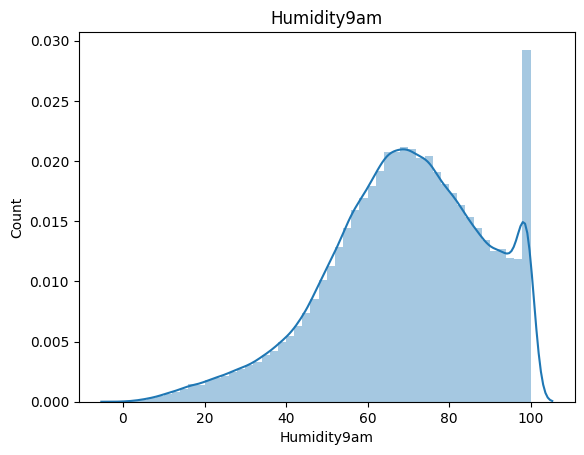

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


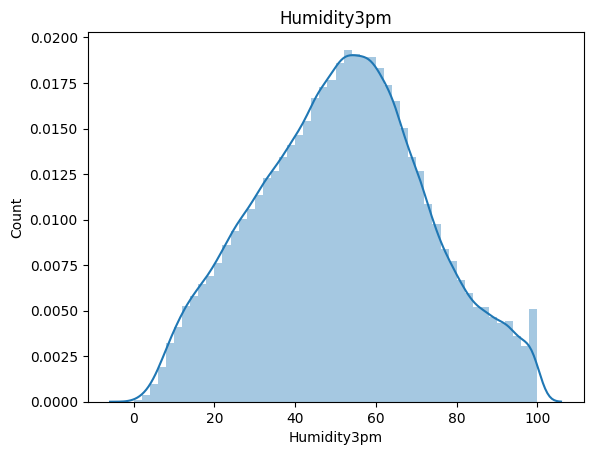

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


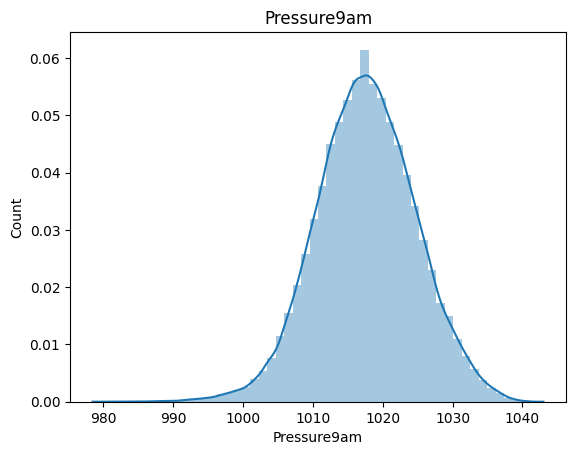

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


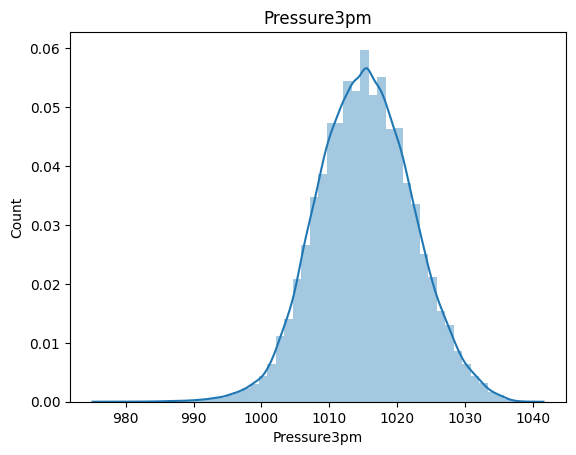

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


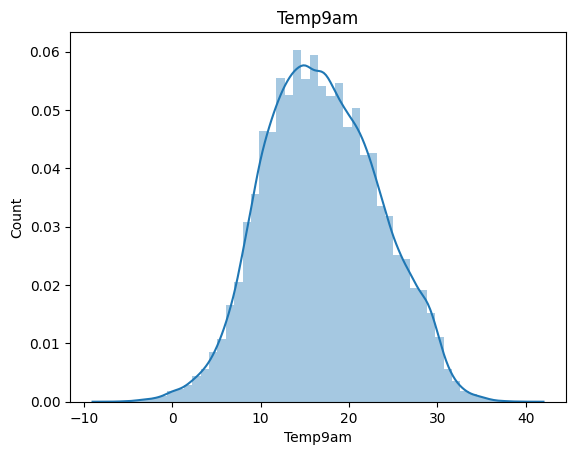

<Figure size 1500x1500 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_21756\2632176795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


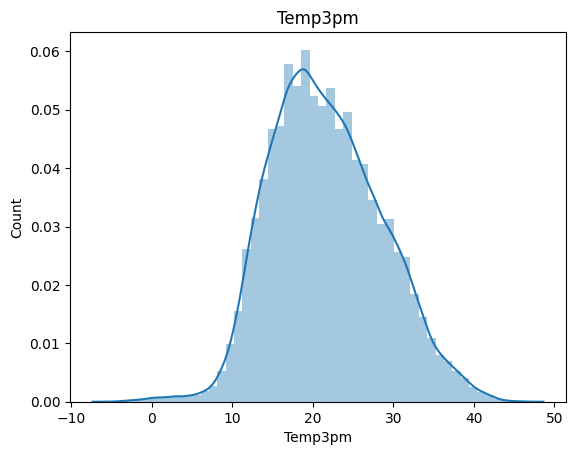

<Figure size 1500x1500 with 0 Axes>

In [42]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

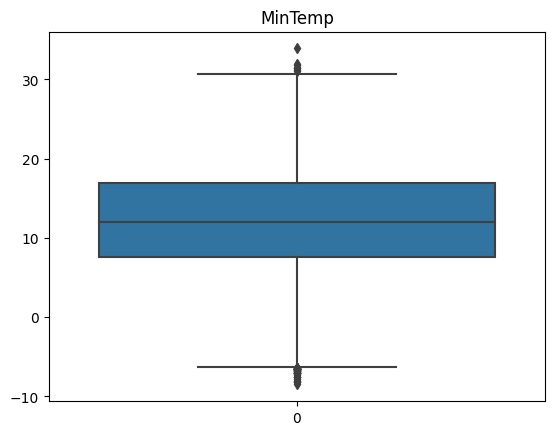

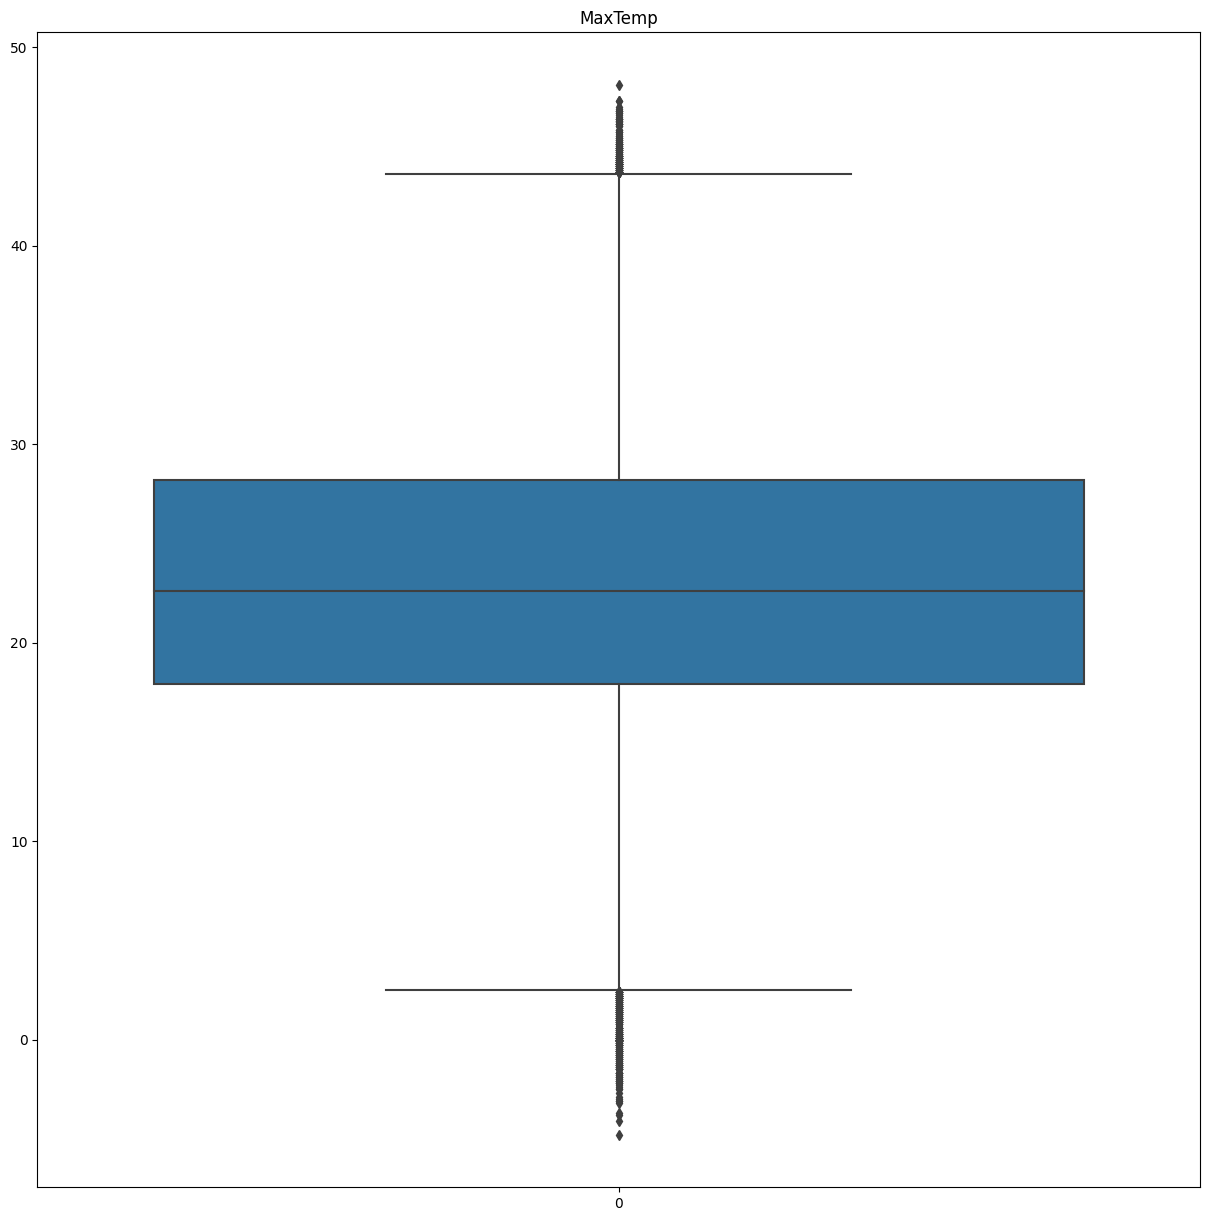

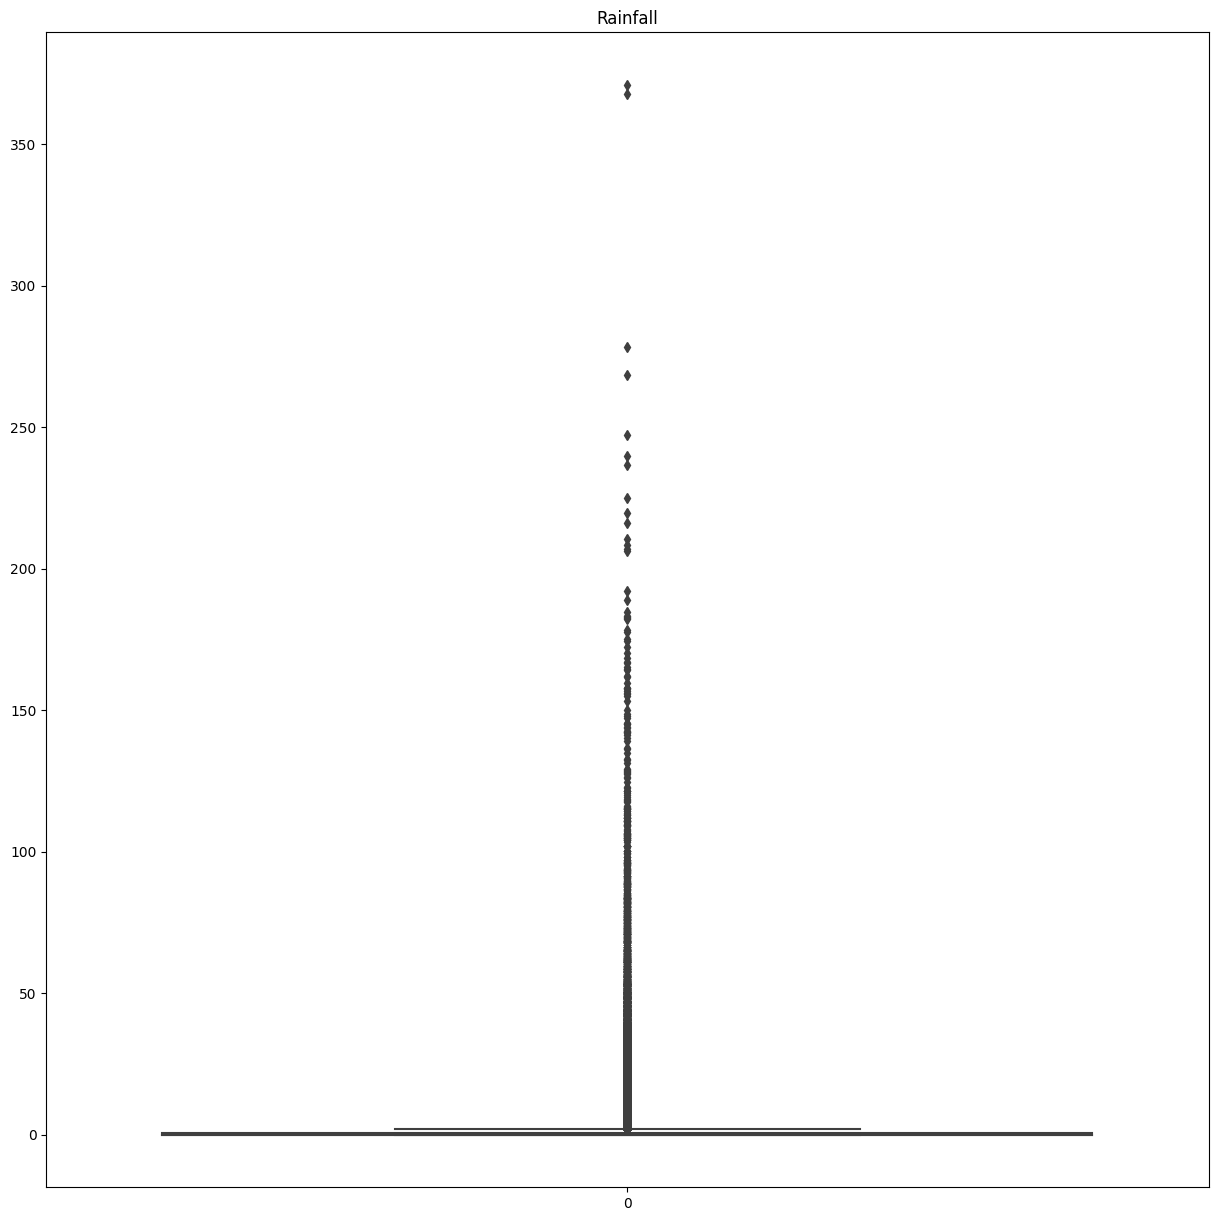

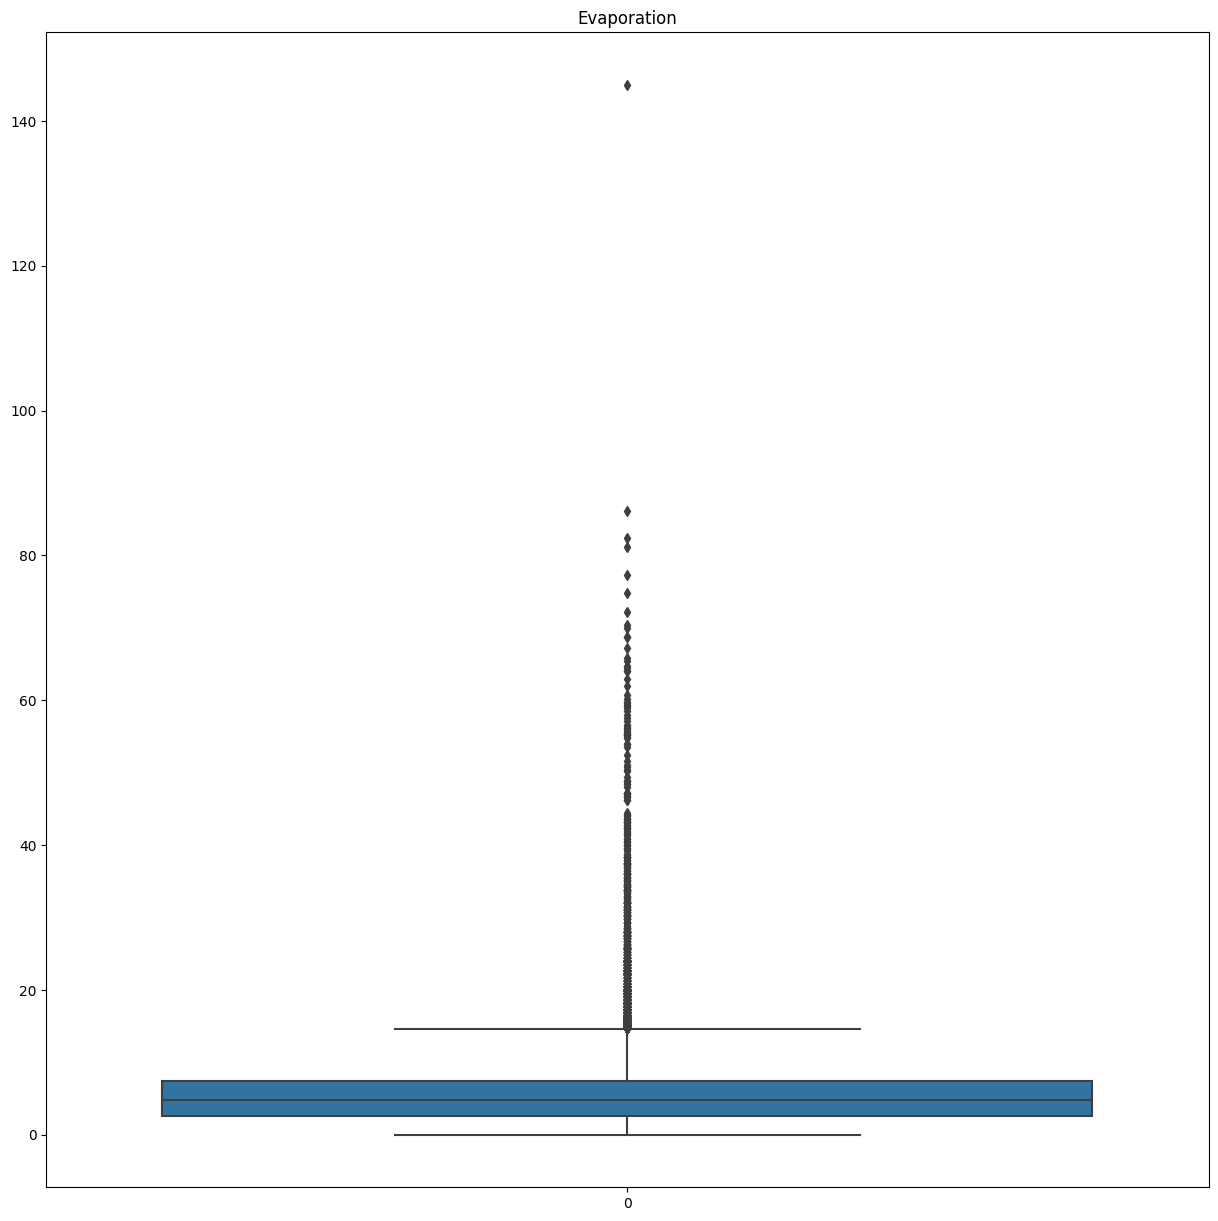

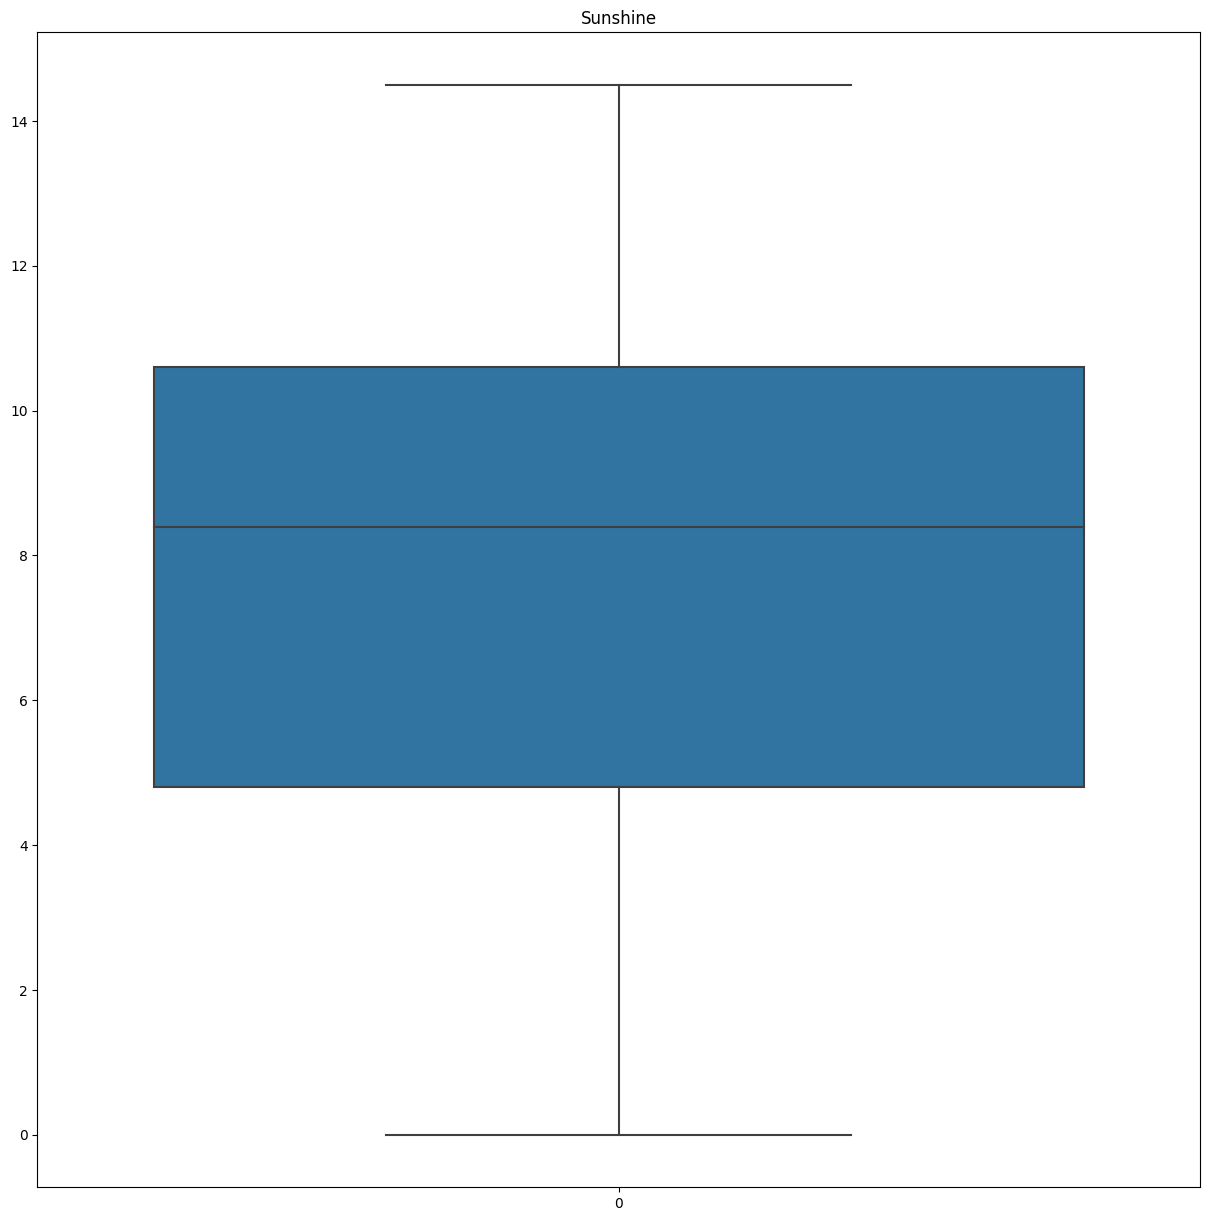

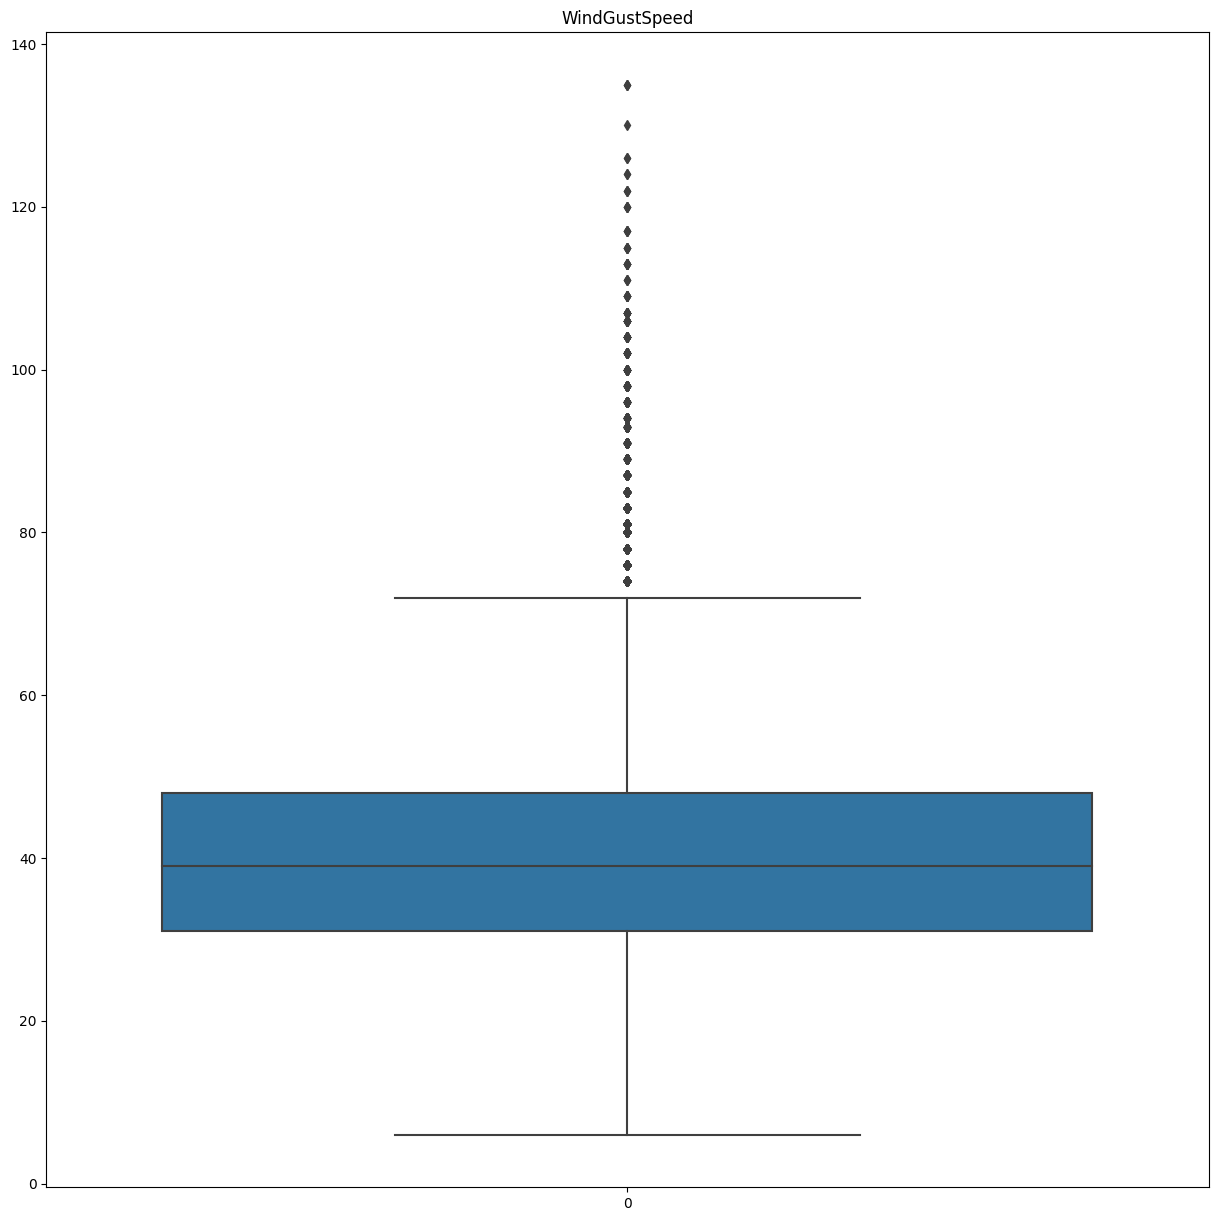

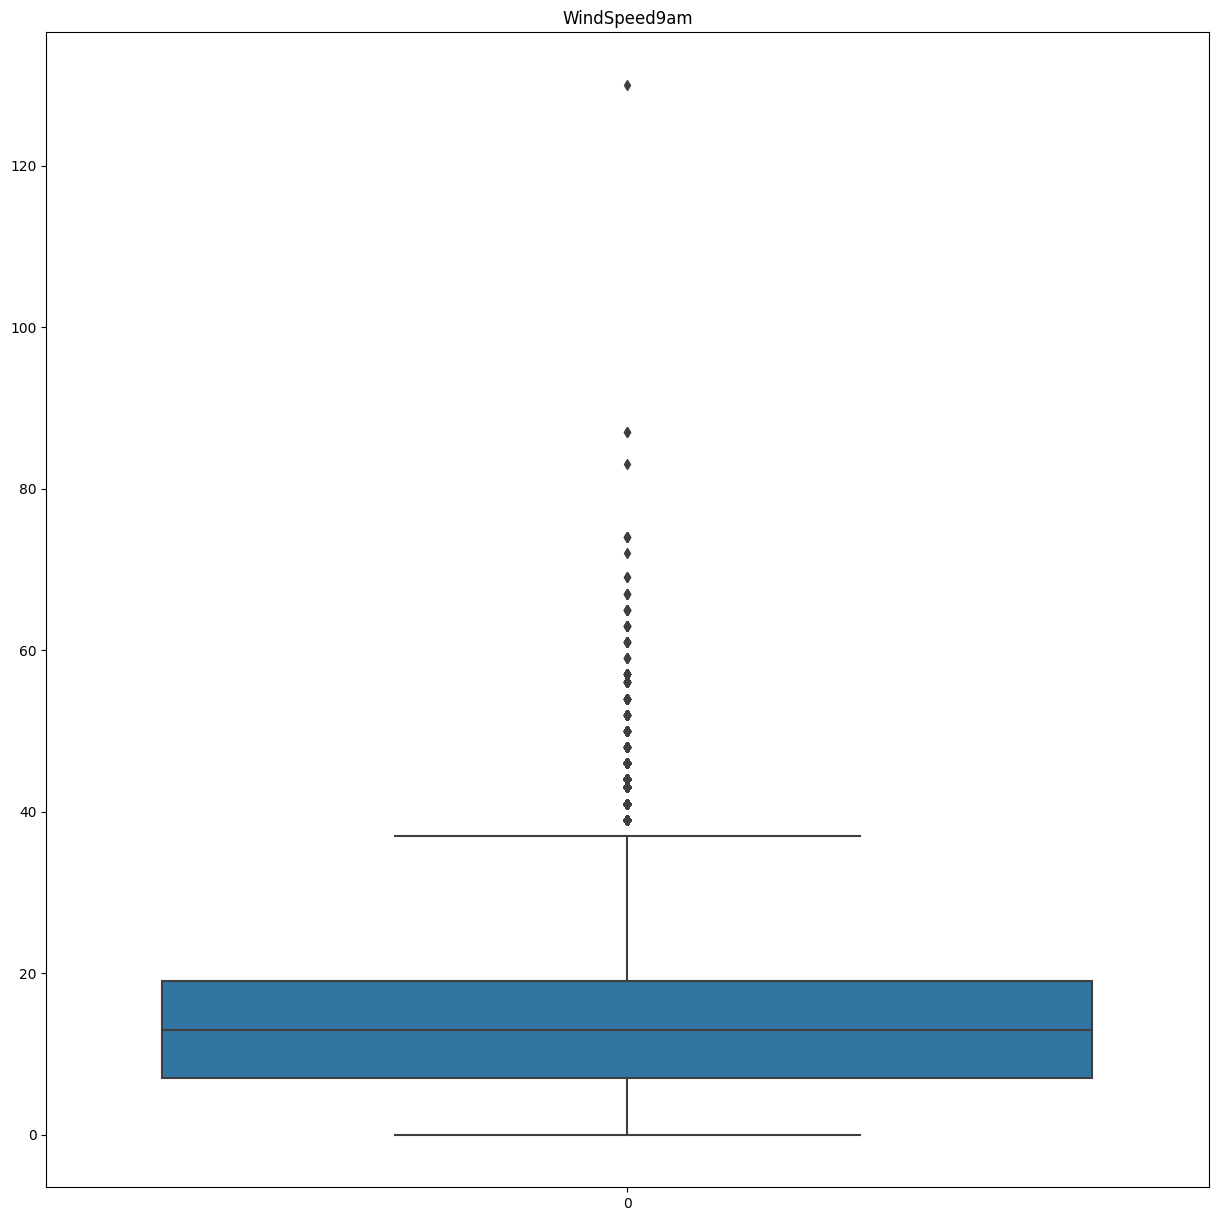

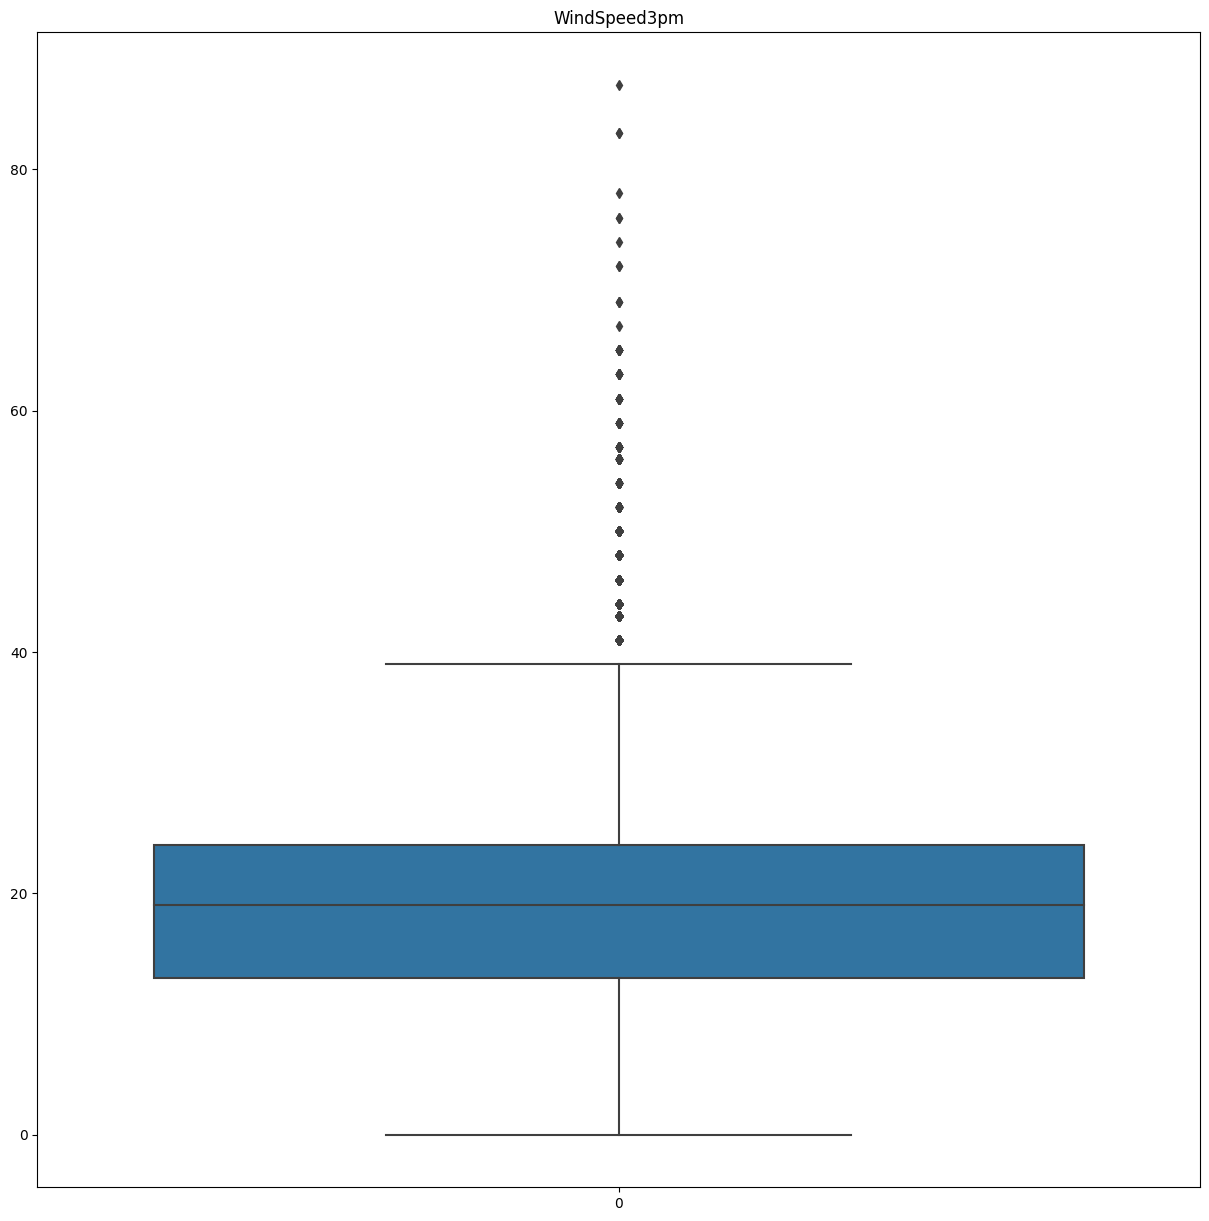

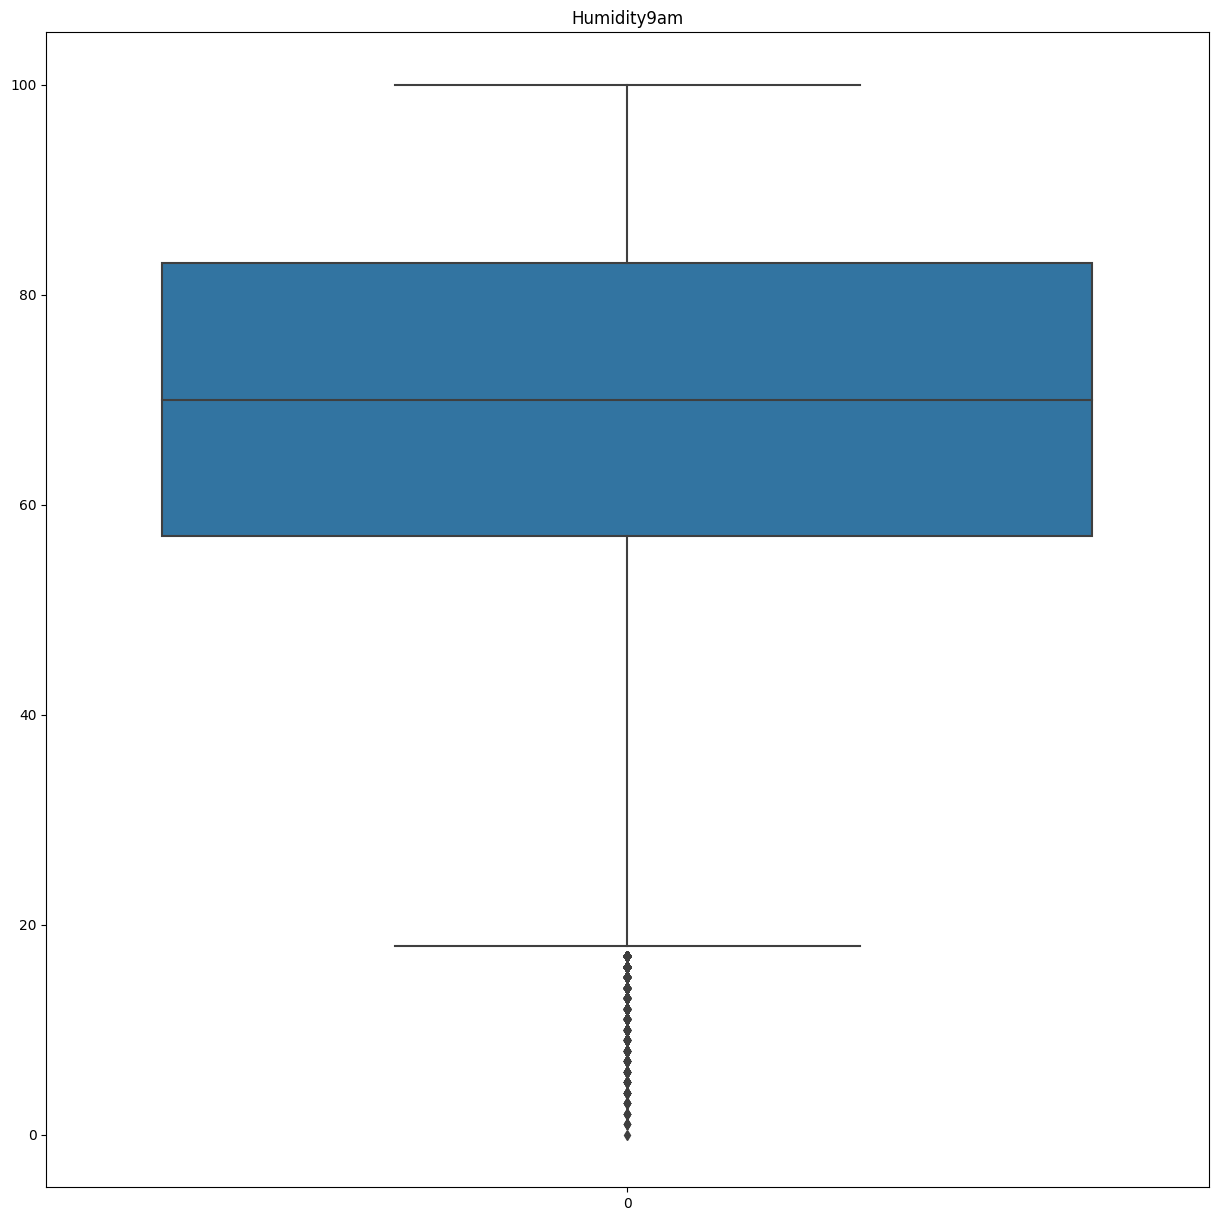

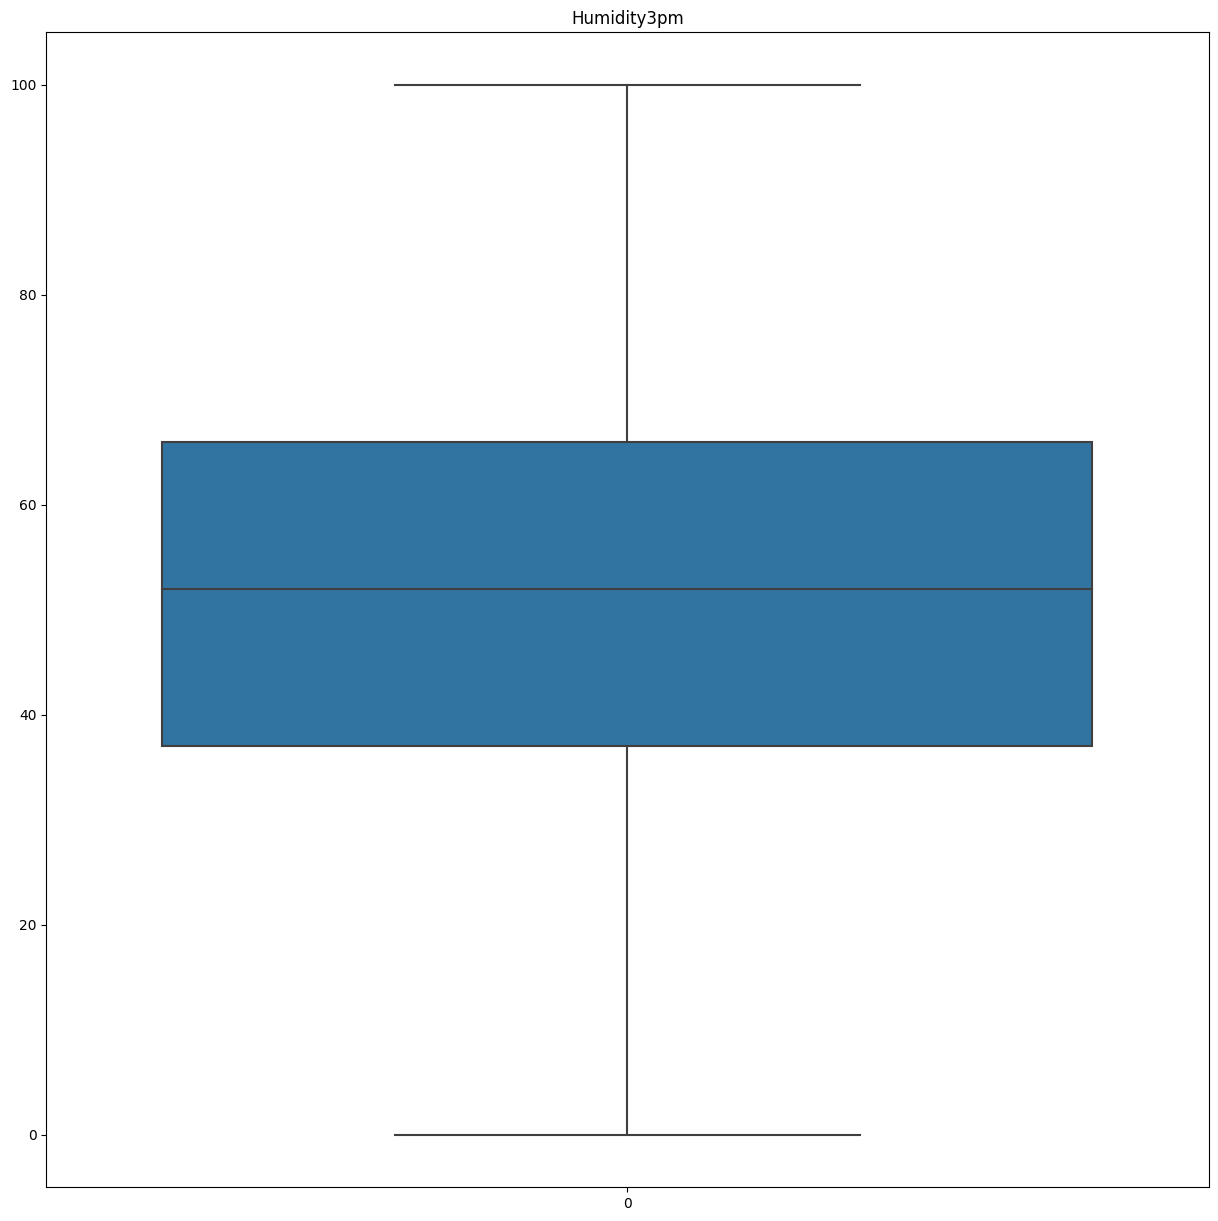

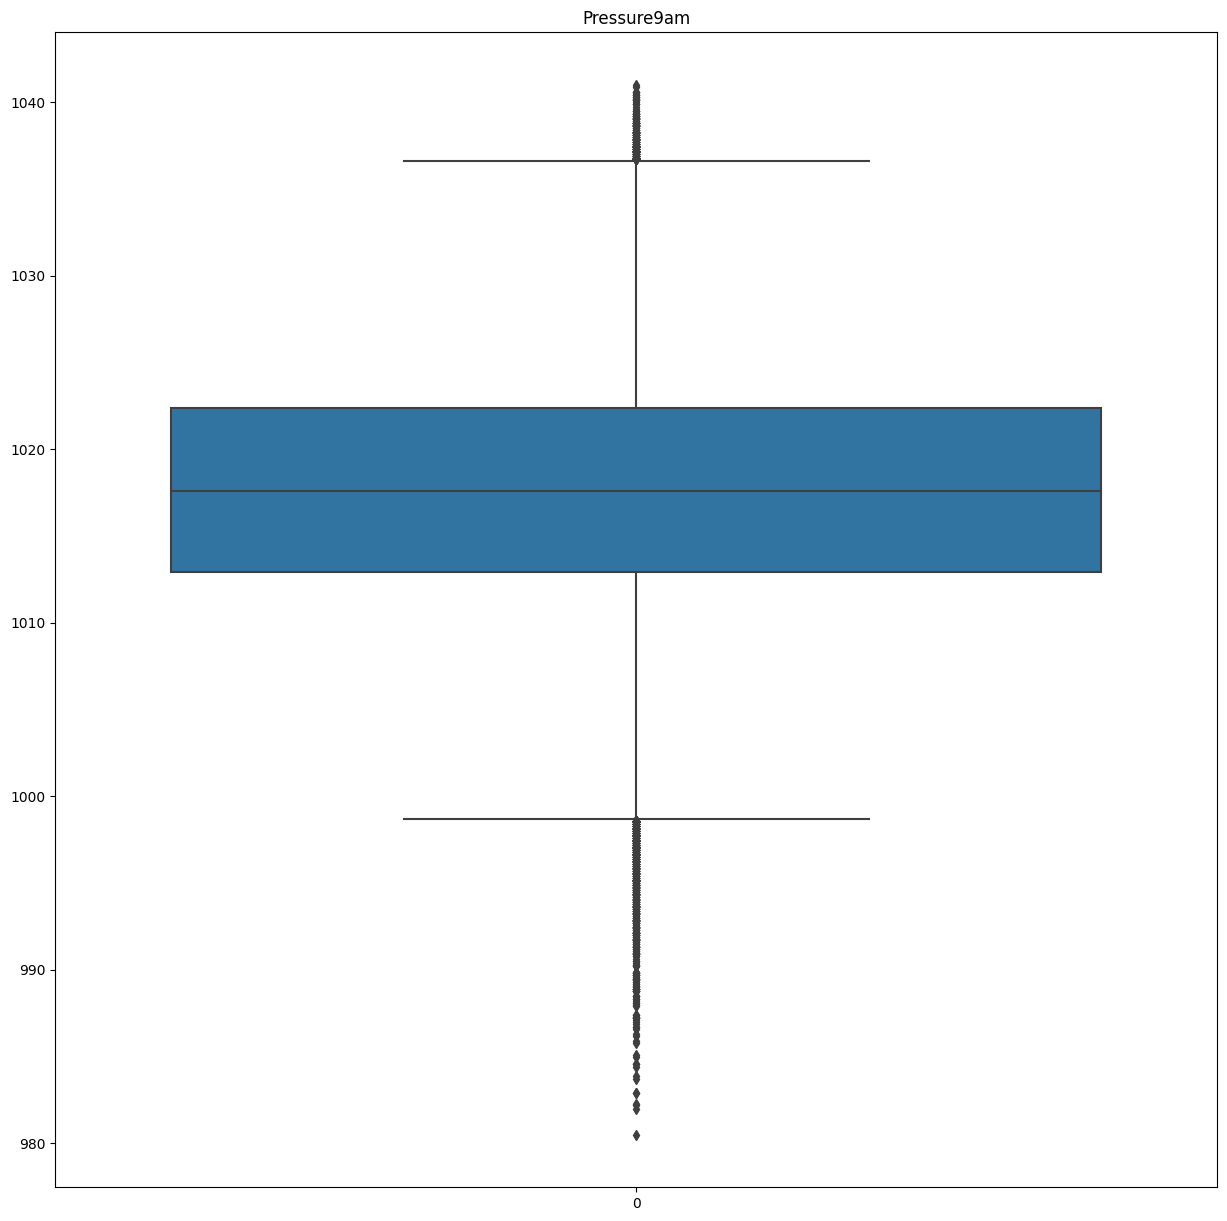

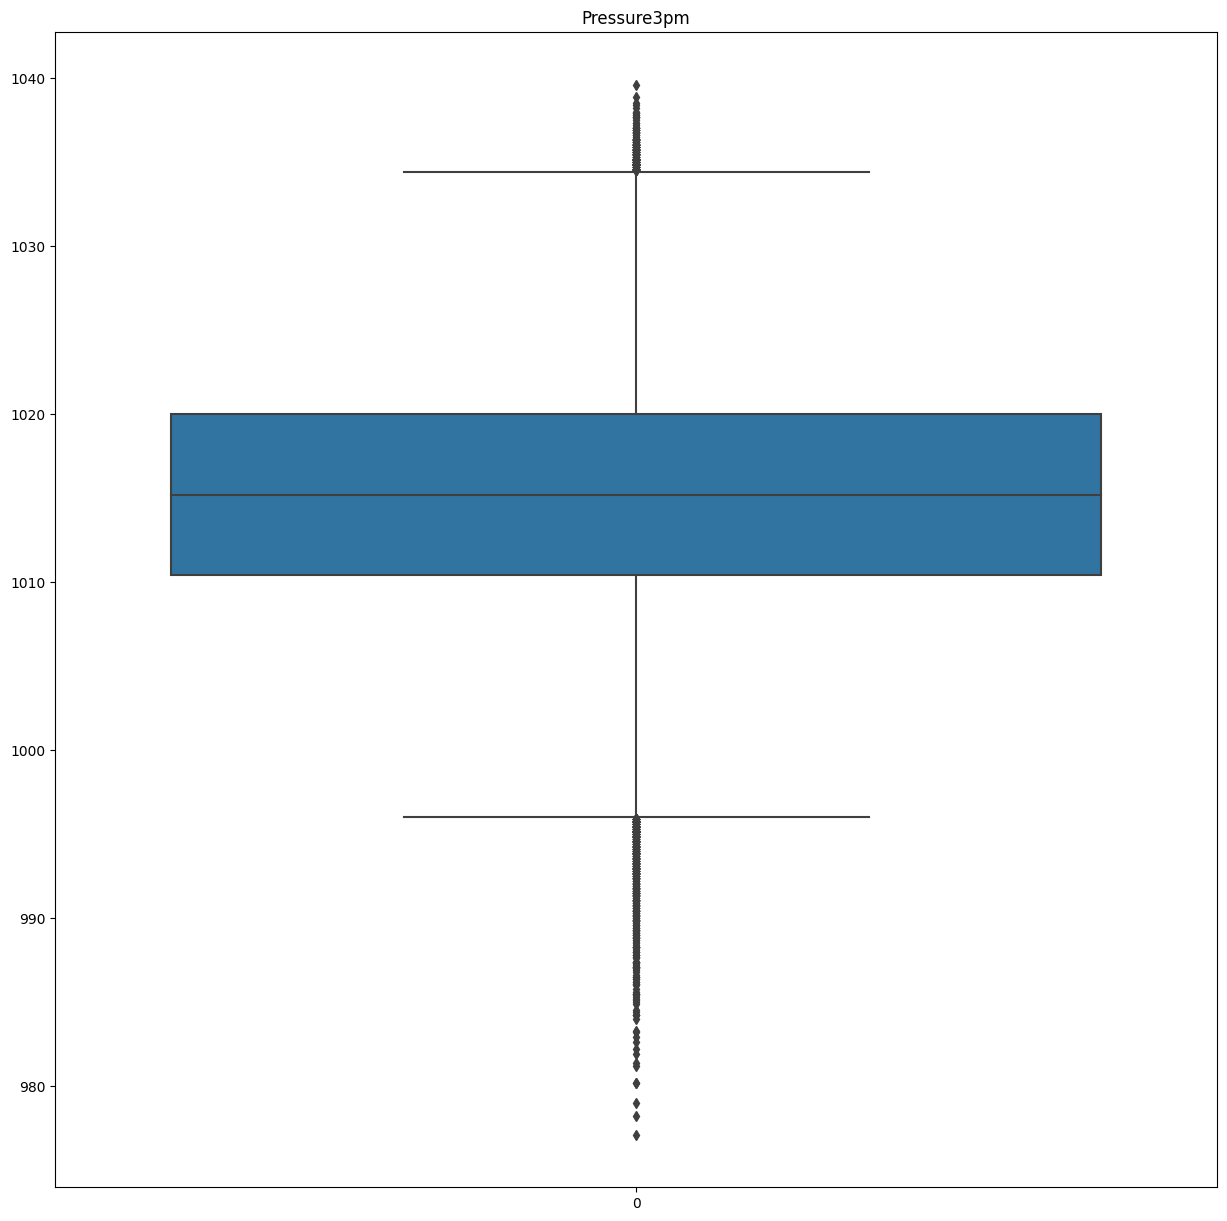

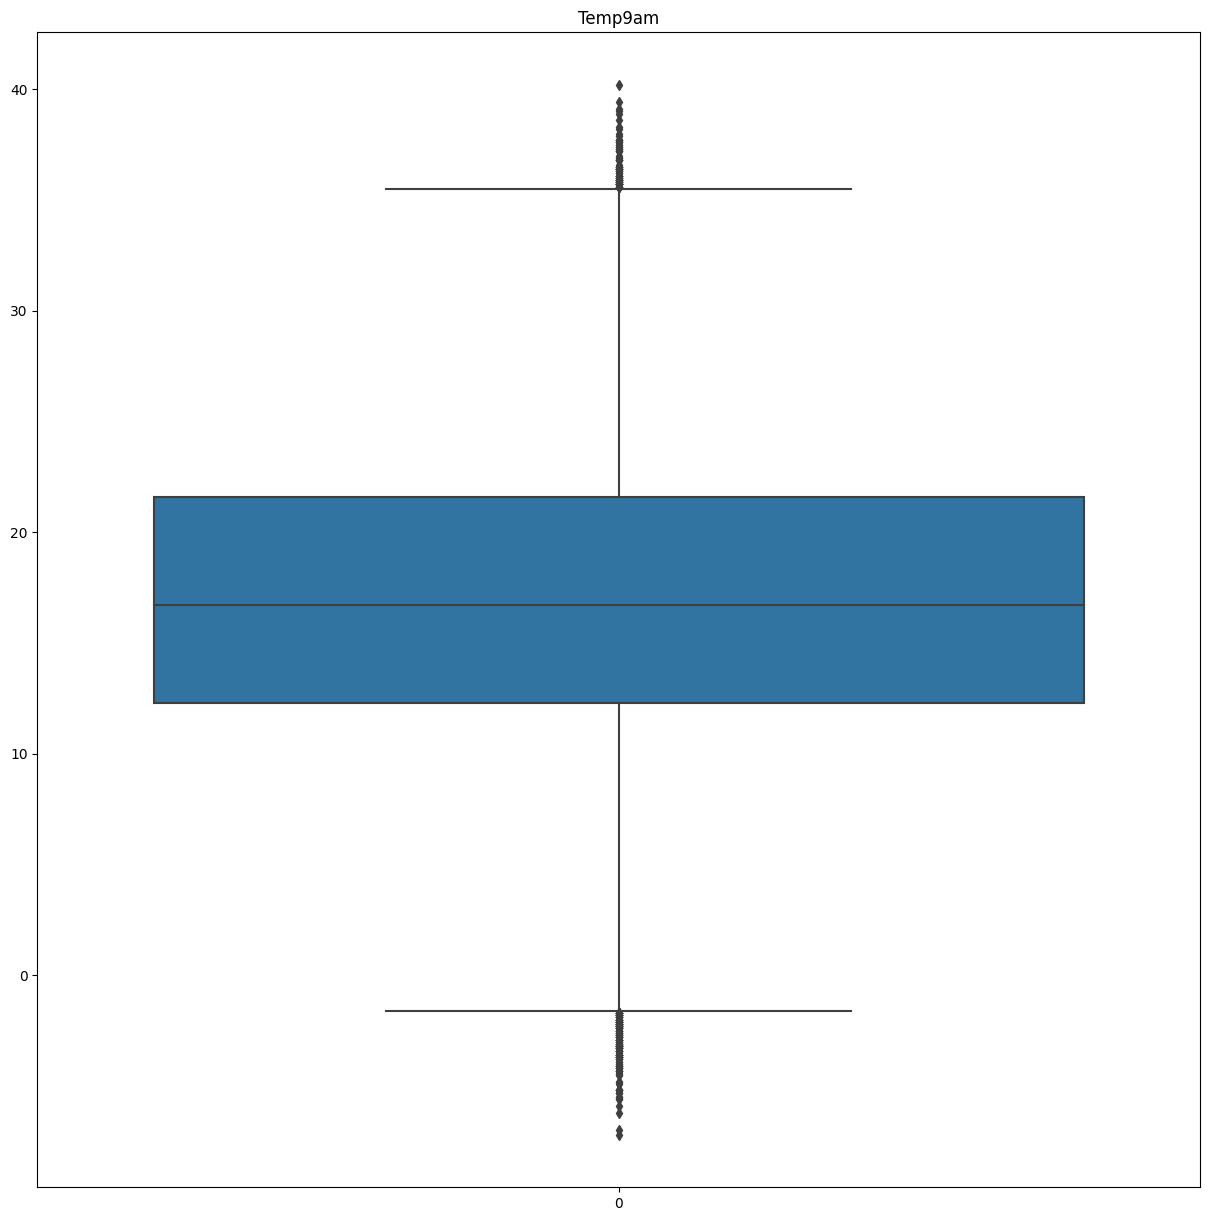

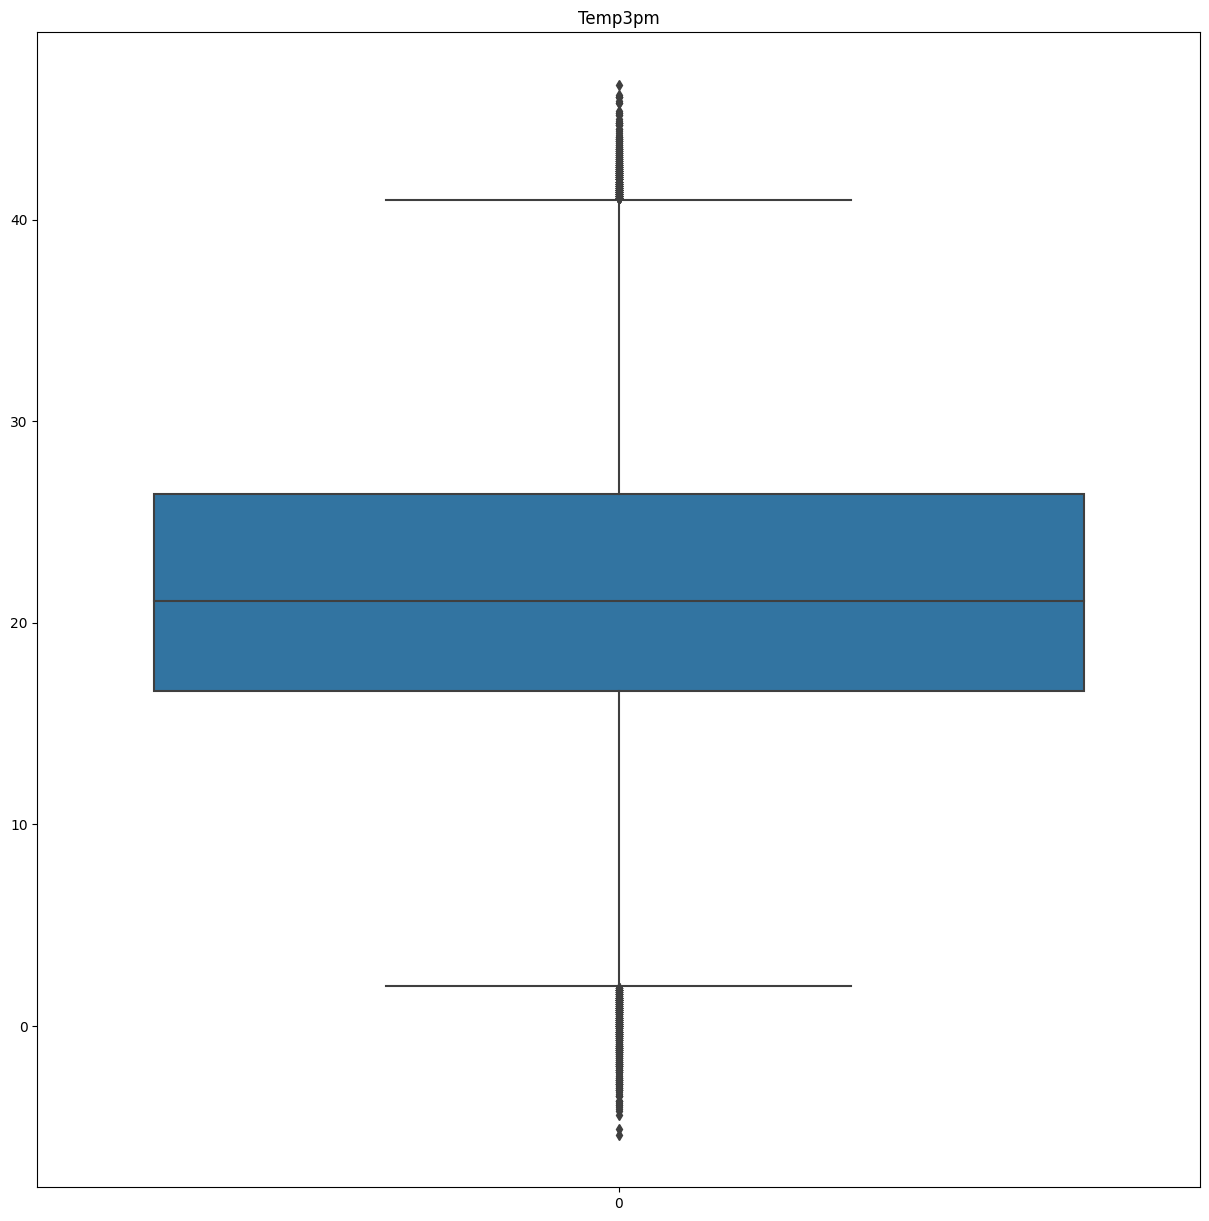

<Figure size 1500x1500 with 0 Axes>

In [43]:
for feature in continuous_feature:
    data = df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [44]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
Year                 0
Month                0
dtype: int64

In [45]:
def Random_Forest_Impute(df, column):
    RandomForestImputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10))
    Data_imputed = RandomForestImputer.fit_transform(df[[column]])
    df_imputed = pd.DataFrame(Data_imputed, columns=[column],index=df.index)
    df[column] = df_imputed[column]
    return df

In [46]:
Random_Forest_Impute(df,'MinTemp')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.9,0.6,NaN,NaN,1,44.0,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.1,0.0,NaN,NaN,2,44.0,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.7,0.0,NaN,NaN,3,46.0,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.0,0.0,NaN,NaN,4,24.0,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.3,1.0,NaN,NaN,1,41.0,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.4,0.0,NaN,NaN,15,31.0,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.3,0.0,NaN,NaN,5,22.0,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.9,0.0,NaN,NaN,6,37.0,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.0,0.0,NaN,NaN,13,28.0,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [47]:
Random_Forest_Impute(df,'MaxTemp')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,NaN,NaN,1,44.0,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,NaN,NaN,2,44.0,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,NaN,NaN,3,46.0,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,NaN,NaN,4,24.0,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,NaN,NaN,1,41.0,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,NaN,NaN,15,31.0,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,NaN,NaN,5,22.0,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,NaN,NaN,6,37.0,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,NaN,NaN,13,28.0,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [48]:
Random_Forest_Impute(df,'Rainfall')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,NaN,NaN,1,44.0,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,NaN,NaN,2,44.0,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,NaN,NaN,3,46.0,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,NaN,NaN,4,24.0,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,NaN,NaN,1,41.0,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,NaN,NaN,15,31.0,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,NaN,NaN,5,22.0,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,NaN,NaN,6,37.0,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,NaN,NaN,13,28.0,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [49]:
Random_Forest_Impute(df,'Evaporation')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,NaN,1,44.0,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,NaN,2,44.0,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,NaN,3,46.0,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,NaN,4,24.0,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,NaN,1,41.0,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,NaN,15,31.0,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,NaN,5,22.0,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,NaN,6,37.0,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,NaN,13,28.0,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [50]:
Random_Forest_Impute(df,'Sunshine')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.0,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.0,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.0,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.0,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.0,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.0,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.0,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.0,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.0,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [51]:
Random_Forest_Impute(df,'WindGustSpeed')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [52]:
Random_Forest_Impute(df,'WindSpeed9am')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [53]:
Random_Forest_Impute(df,'WindSpeed3pm')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [54]:
Random_Forest_Impute(df,'Humidity9am')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [55]:
Random_Forest_Impute(df,'Humidity3pm')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [56]:
Random_Forest_Impute(df,'Pressure9am')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [57]:
Random_Forest_Impute(df,'Pressure3pm')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


In [58]:
Random_Forest_Impute(df,'Cloud9am')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,NaN,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,NaN,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.0,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,NaN,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,NaN,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,NaN,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,NaN,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.0,15.1,26.0,0,0,2017,6


In [59]:
Random_Forest_Impute(df,'Cloud3pm')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6


In [60]:
Random_Forest_Impute(df,'Temp9am')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6


In [61]:
Random_Forest_Impute(df,'Temp3pm')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6


In [62]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
Year             0.0
Month            0.0
dtype: float64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int32  
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [64]:
def plots(df,column):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[column].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[column],dist='norm',plot=plt)
    plt.show()

MinTemp


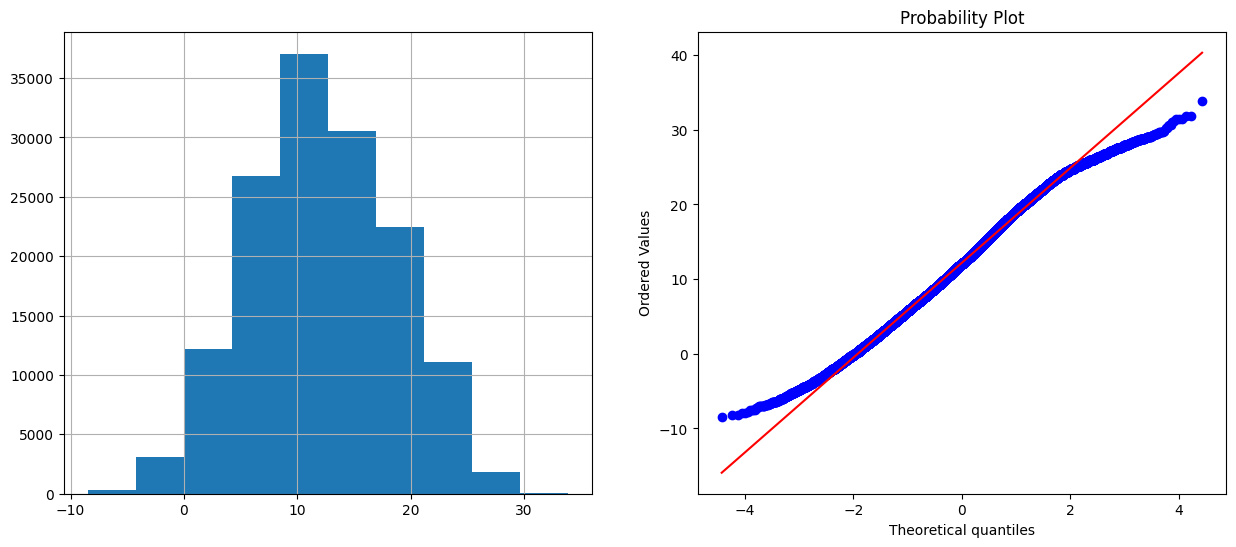

MaxTemp


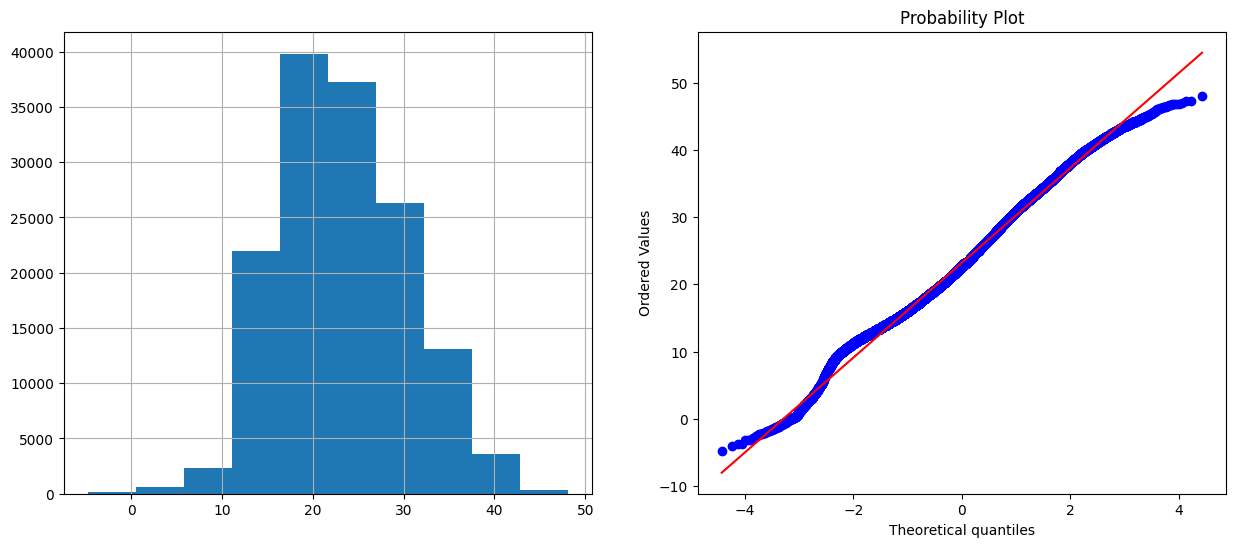

Rainfall


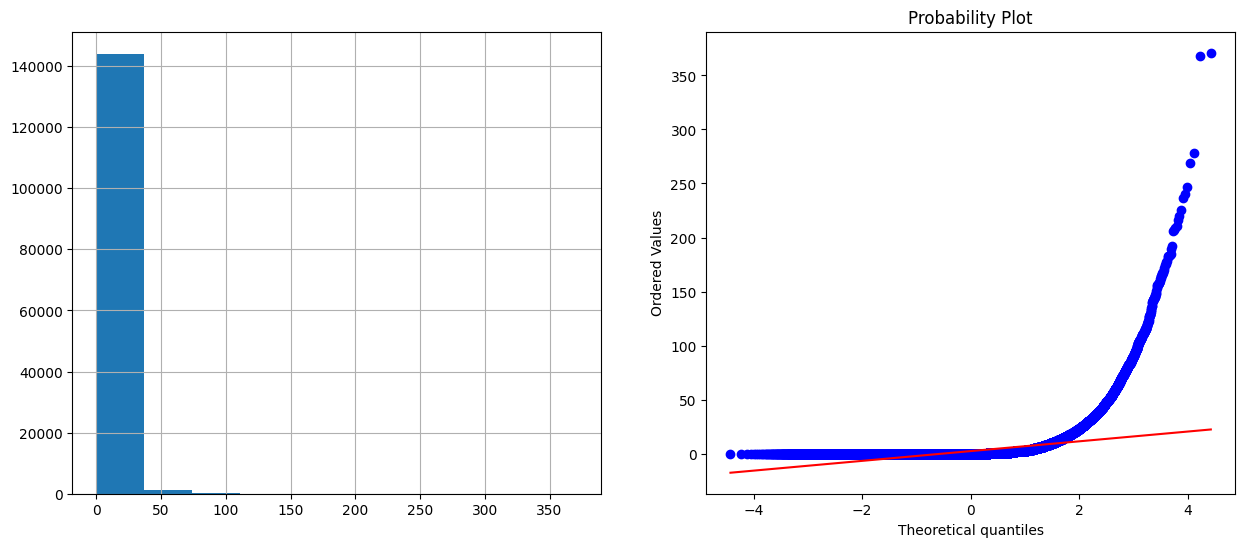

Evaporation


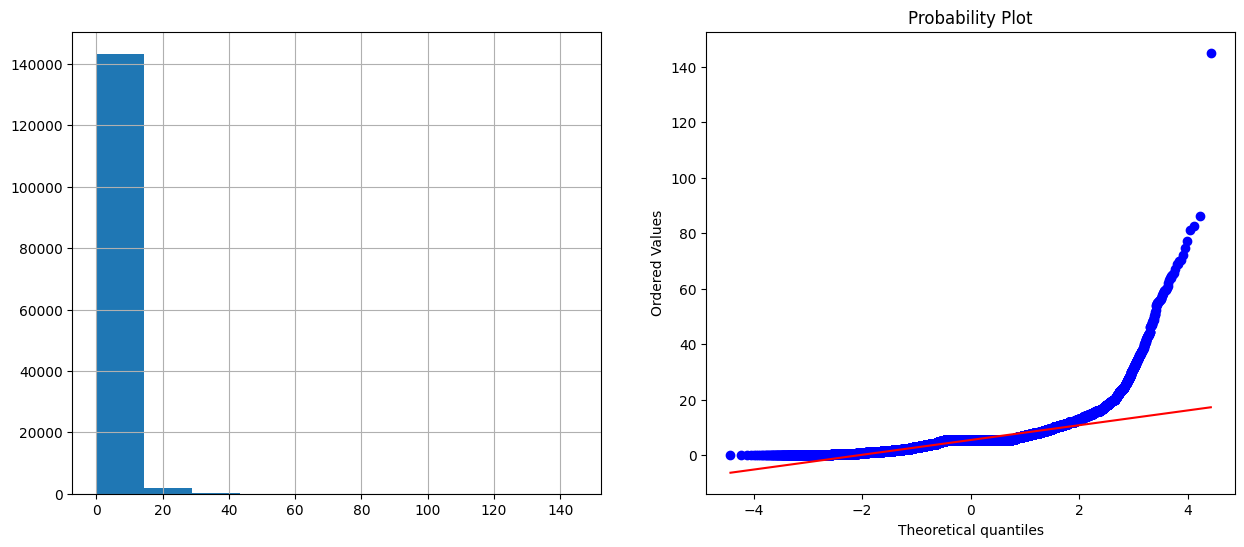

Sunshine


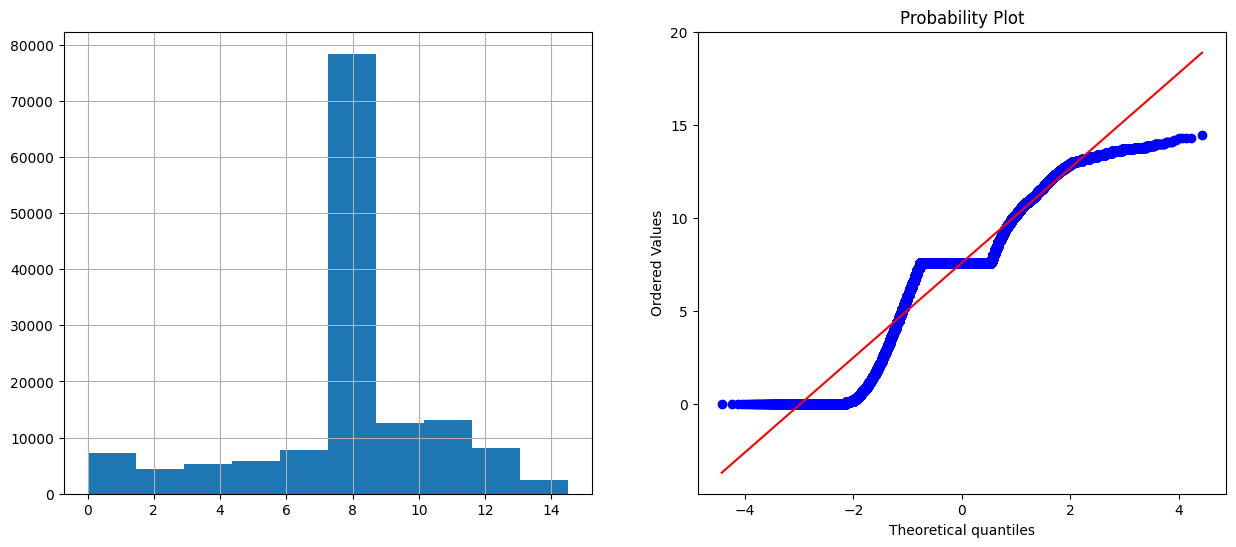

WindGustSpeed


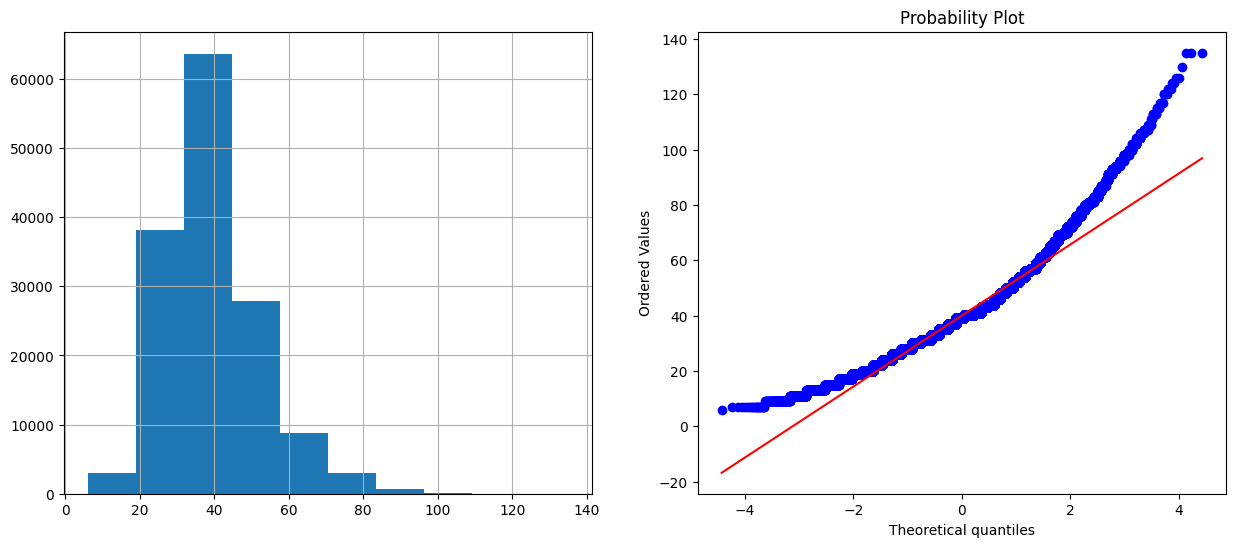

WindSpeed9am


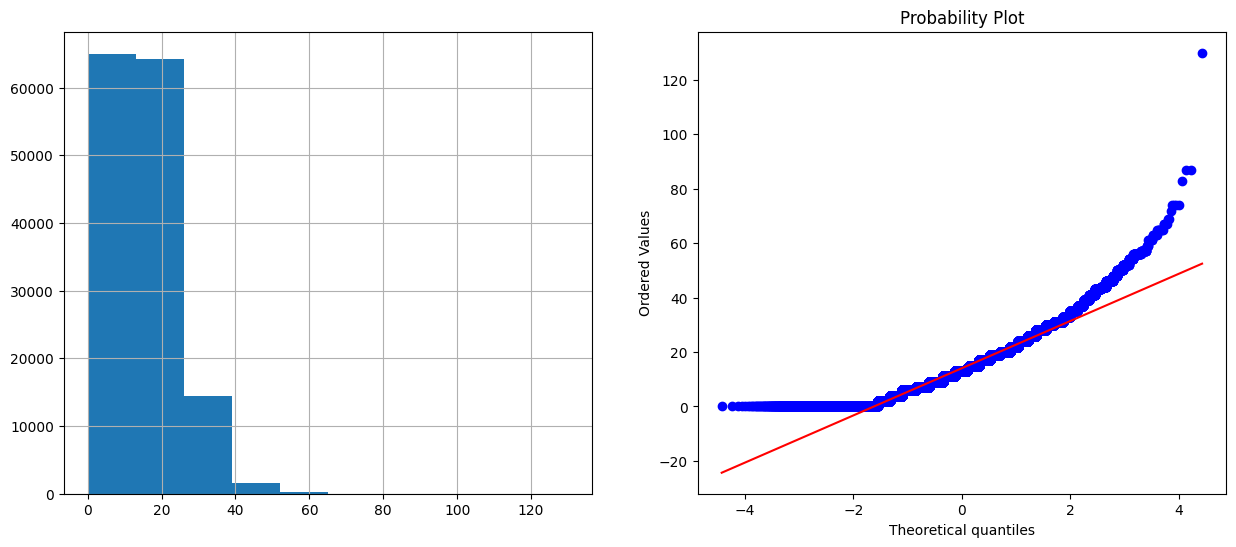

WindSpeed3pm


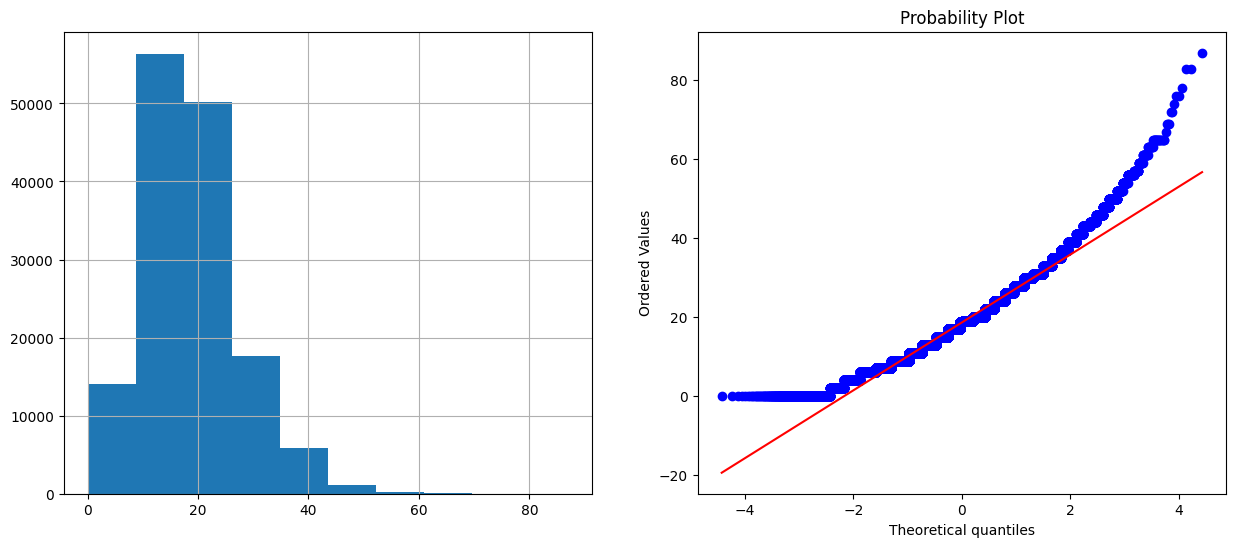

Humidity9am


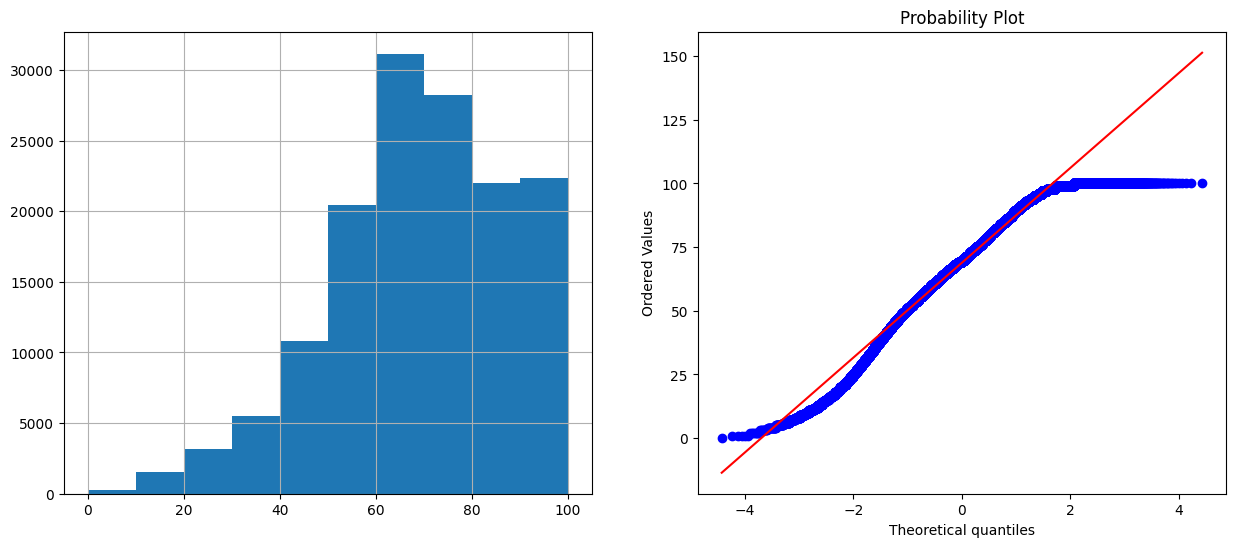

Humidity3pm


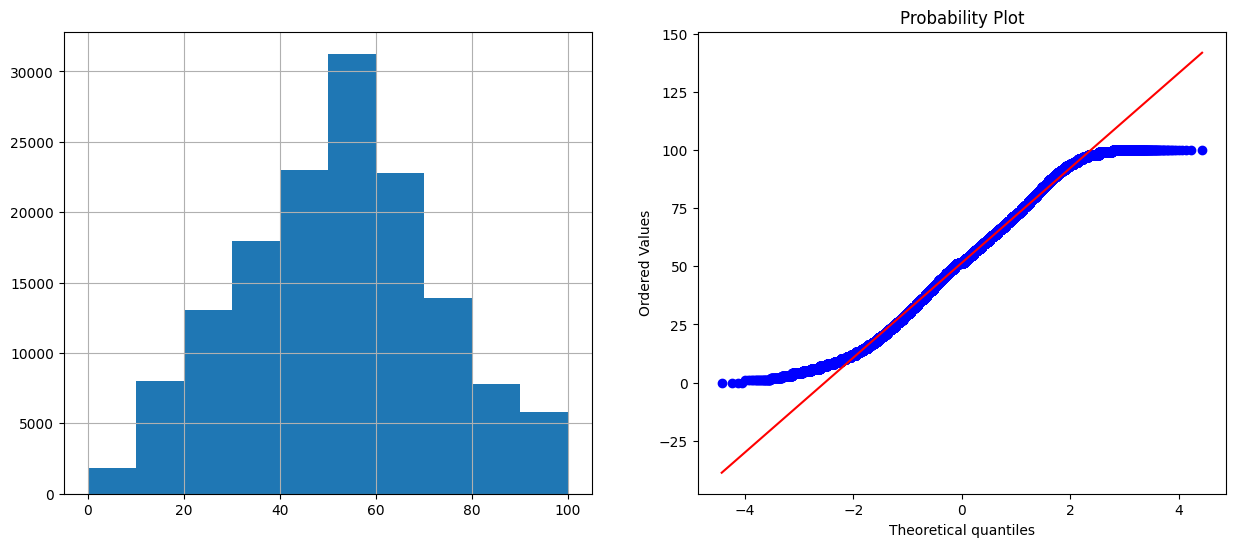

Pressure9am


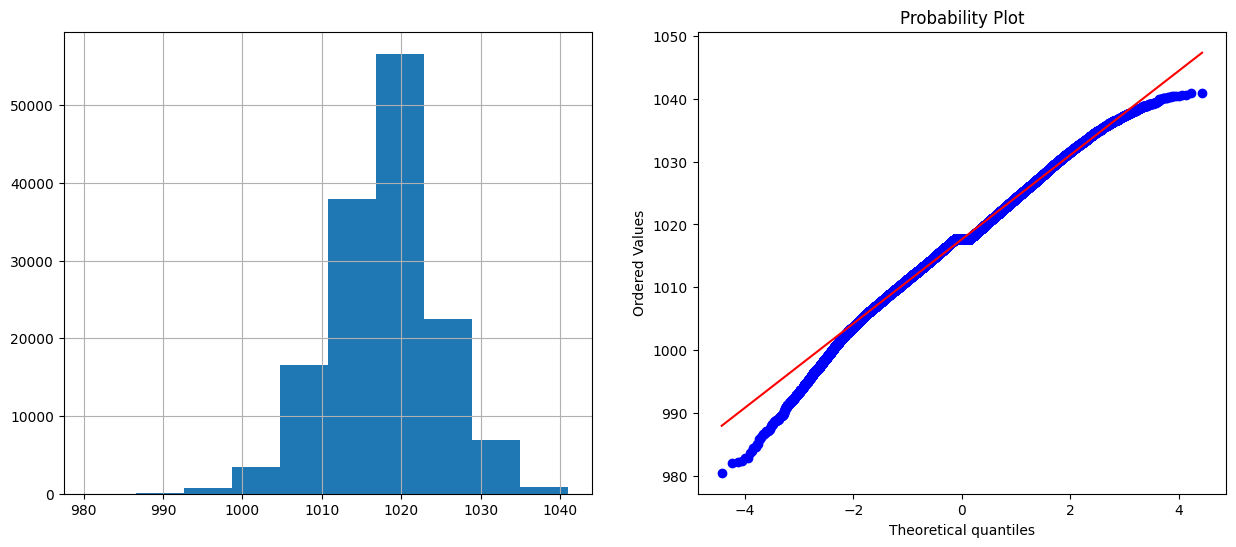

Pressure3pm


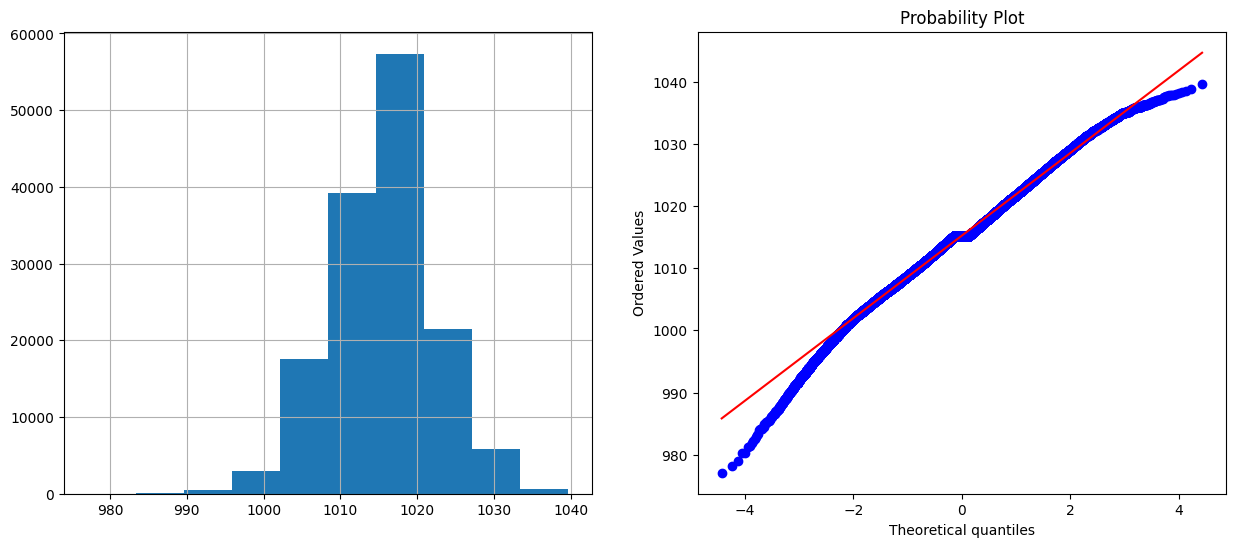

Temp9am


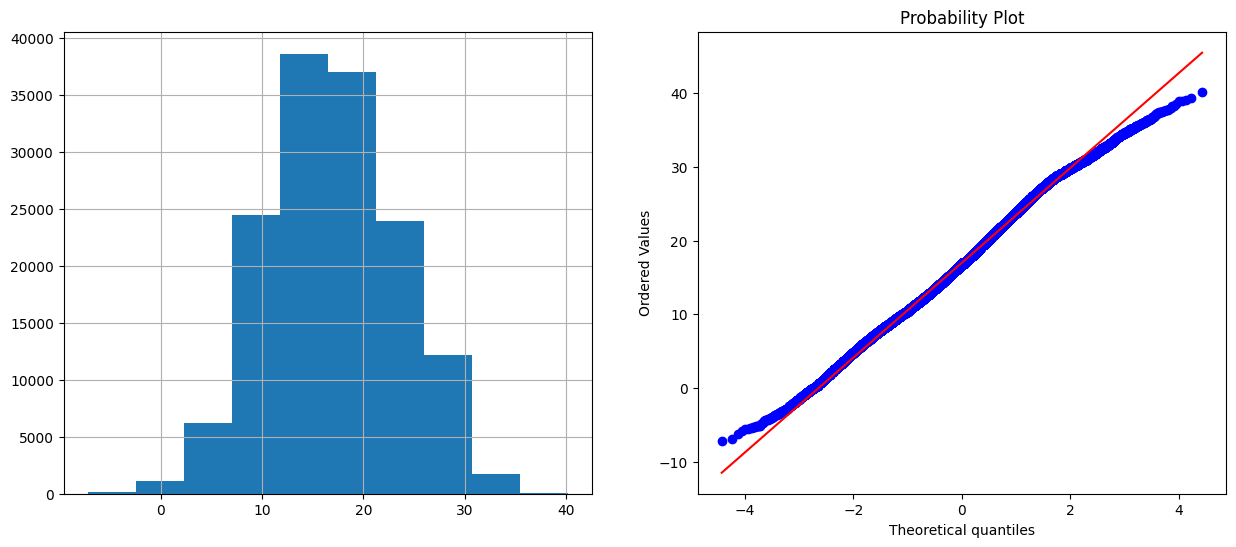

Temp3pm


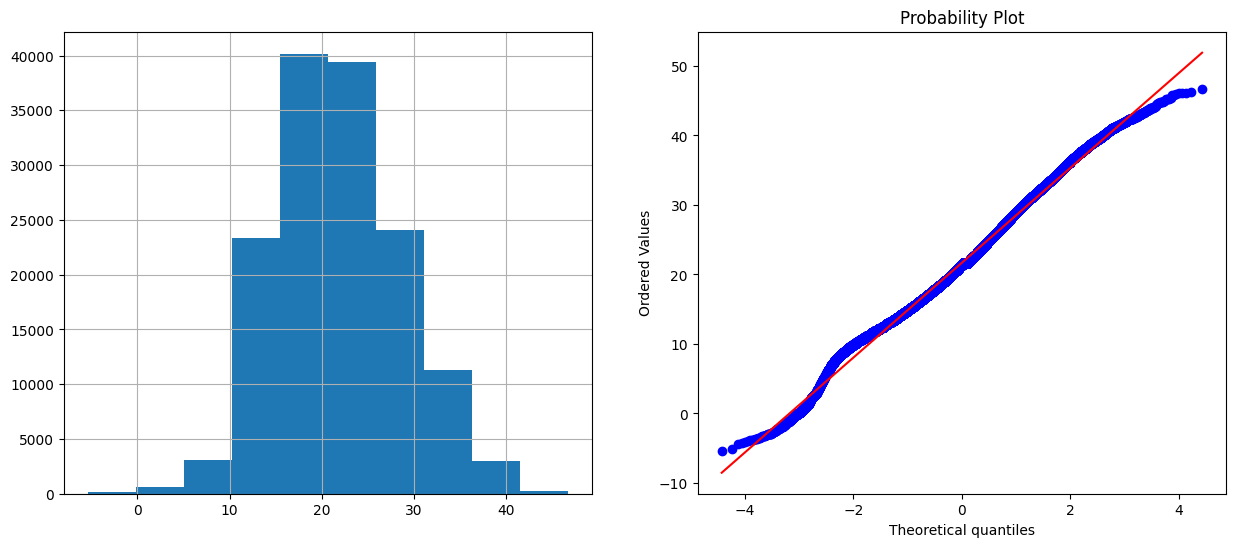

In [65]:
for columns in continuous_feature:
    print(columns)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[columns].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[columns],dist='norm',plot=plt)
    plt.show()

In [66]:
for column in continuous_feature:
    print(column)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [67]:
def fun(df,column):
    Range = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bridge = df[column].quantile(0.25)-(Range*1.5)
    upper_bridge = df[column].quantile(0.75)+(Range*1.5)
    print(lower_bridge,upper_bridge)

In [68]:
fun(df,'MinTemp')
fun(df,'MaxTemp')
fun(df,'Rainfall')
fun(df,'Evaporation')
fun(df,'WindGustSpeed')
fun(df,'WindSpeed9am')
fun(df,'WindSpeed3pm')
fun(df,'Humidity9am')
fun(df,'Pressure9am')
fun(df,'Pressure3pm')
fun(df,'Temp9am')
fun(df,'Temp3pm')
fun(df,'Sunshine')
fun(df,'Humidity3pm')

-5.950000000000002 30.450000000000003
2.700000000000001 43.5
-1.5 2.5
1.797652715616307 7.670578807306155
8.5 68.5
-11.0 37.0
-3.5 40.5
18.0 122.0
1001.0500000000001 1034.25
998.6500000000001 1031.85
-1.4999999999999982 35.3
2.4499999999999993 40.45
5.977943801652892 10.333233719008263
-5.0 107.0


In [69]:
df.loc[df['MinTemp']>=30.84,'MinTemp']=30.84
df.loc[df['MinTemp']<=-6.35,'MinTemp']=-6.35


df.loc[df['MaxTemp']>=43.65,'MaxTemp']=43.65
df.loc[df['MaxTemp']<=2.45,'MaxTemp']=2.45

df.loc[df['Rainfall']>=2,'Rainfall']=2
df.loc[df['Rainfall']<=-1.2,'Rainfall']=-1.2

df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

df.loc[df['WindGustSpeed']>=73.5,'WindGustSpeed']=73.5
df.loc[df['WindGustSpeed']<=5.5,'WindGustSpeed']=5.5

df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

df.loc[df['Pressure9am']>=1036.65,'Pressure9am']=1036.65
df.loc[df['Pressure9am']<=998.65,'Pressure9am']=998.65

df.loc[df['Pressure3pm']>=1034.65,'Pressure3pm']=1034.65
df.loc[df['Pressure3pm']<=996.00,'Pressure3pm']=996.00

df.loc[df['Temp9am']>=35.55,'Temp9am']=35.55
df.loc[df['Temp9am']<=-1.65,'Temp9am']=-1.65

df.loc[df['Temp3pm']>=41.01,'Temp3pm']=41.01
df.loc[df['Temp3pm']<=1.90,'Temp3pm']=1.90

df.loc[df['Sunshine']>=19.3,'Sunshine']=19.3
df.loc[df['Sunshine']<=-3.9,'Sunshine']=-3.9

df.loc[df['Humidity3pm']>=109.5,'Humidity3pm']=109.5
df.loc[df['Humidity3pm']<=-6.5,'Humidity3pm']=-6.5

In [70]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
dtype: int64

In [71]:
def plots(df,column):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[column].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[column],dist='norm',plot=plt)
    plt.show()

MinTemp


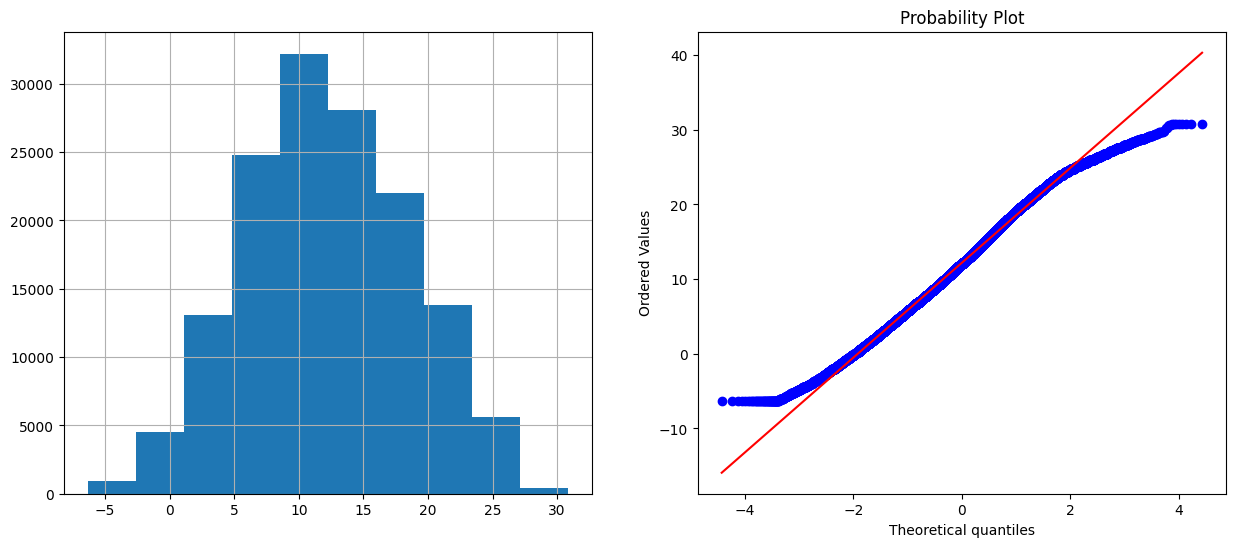

MaxTemp


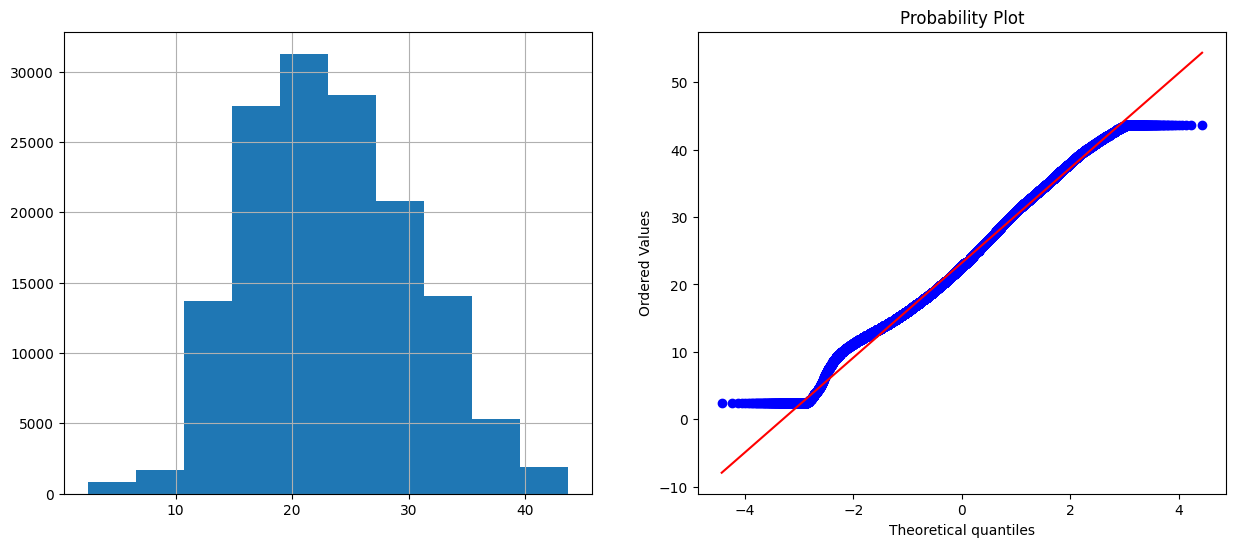

Rainfall


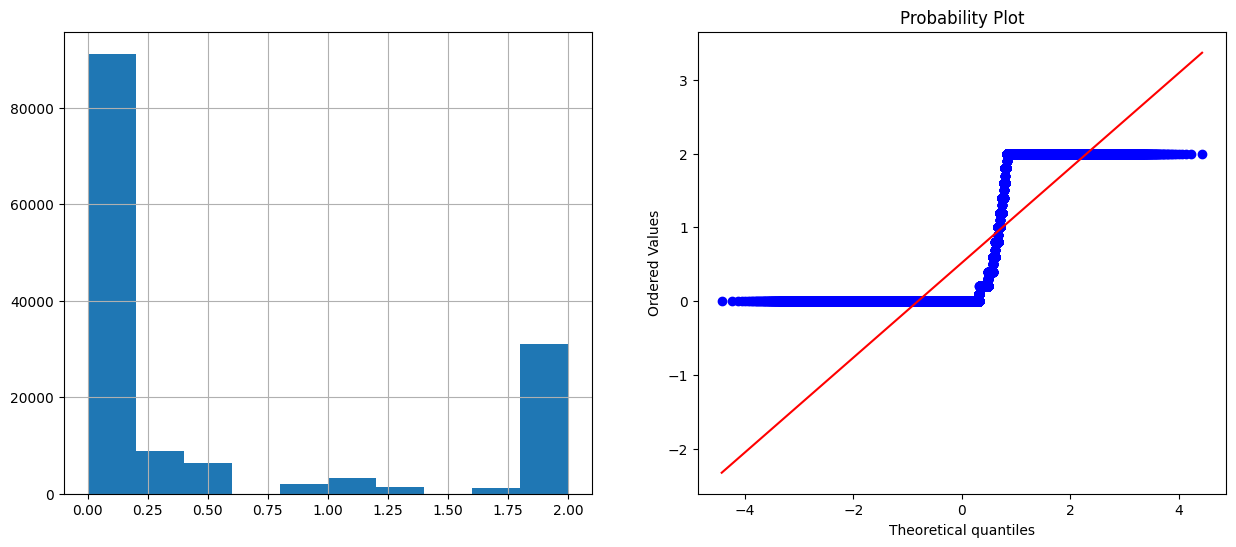

Evaporation


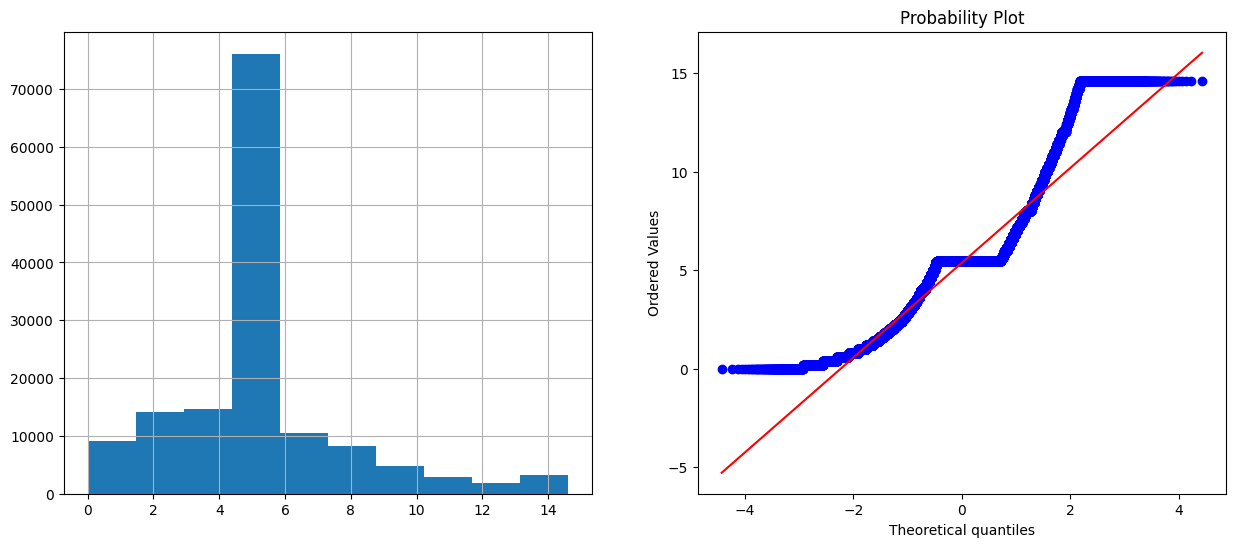

Sunshine


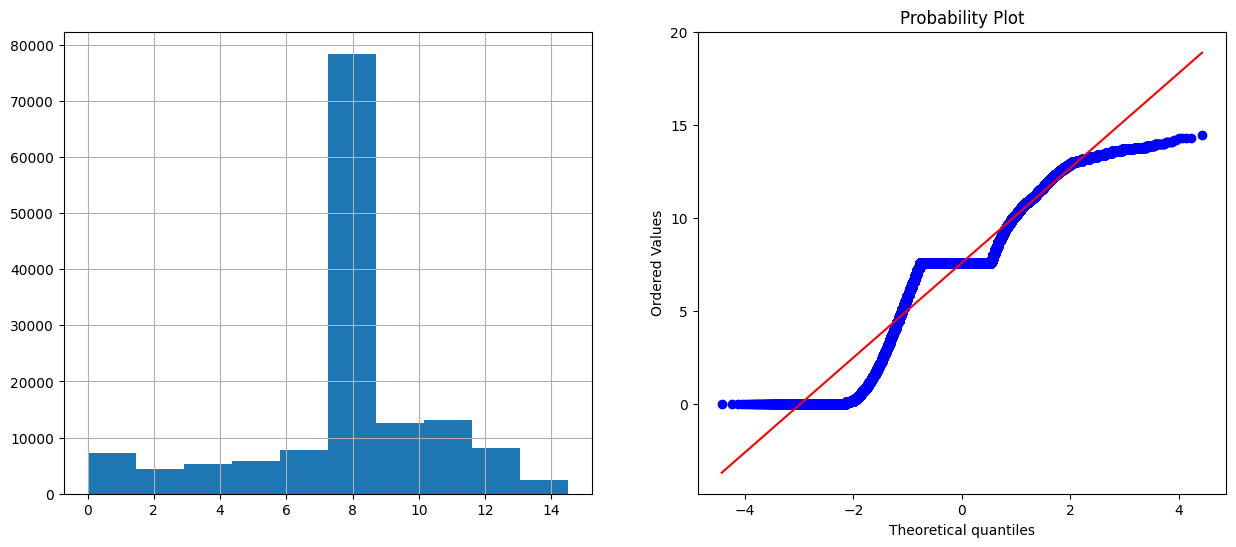

WindGustSpeed


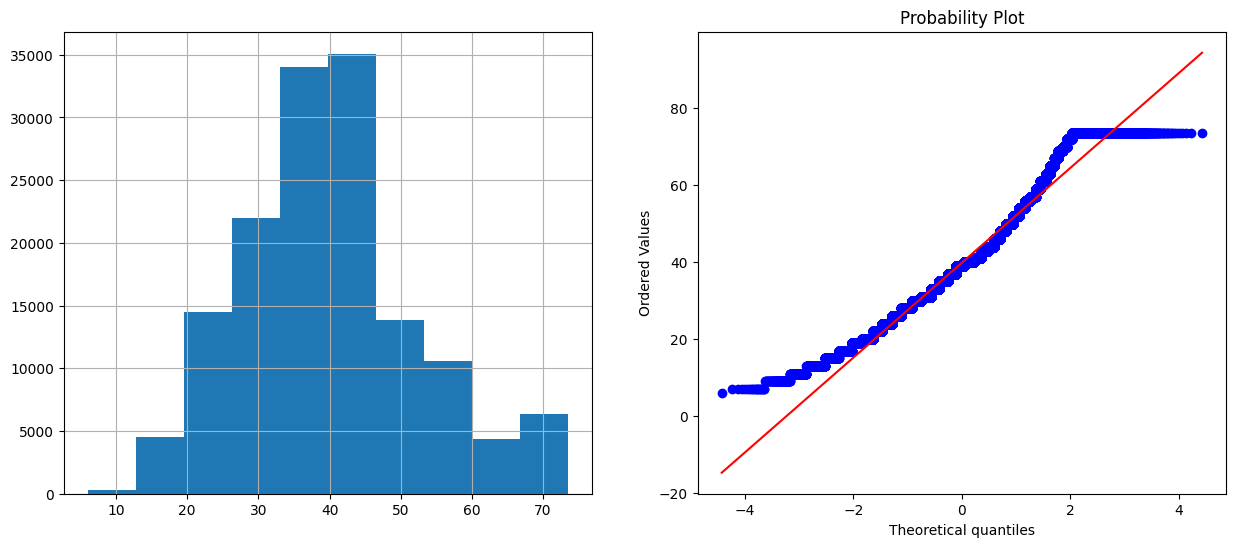

WindSpeed9am


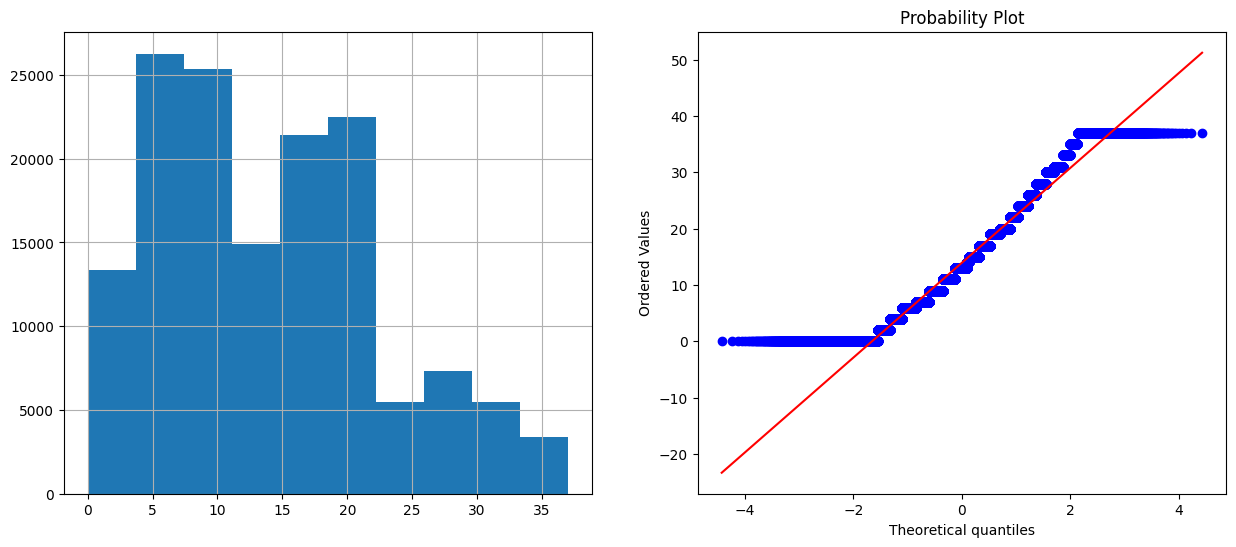

WindSpeed3pm


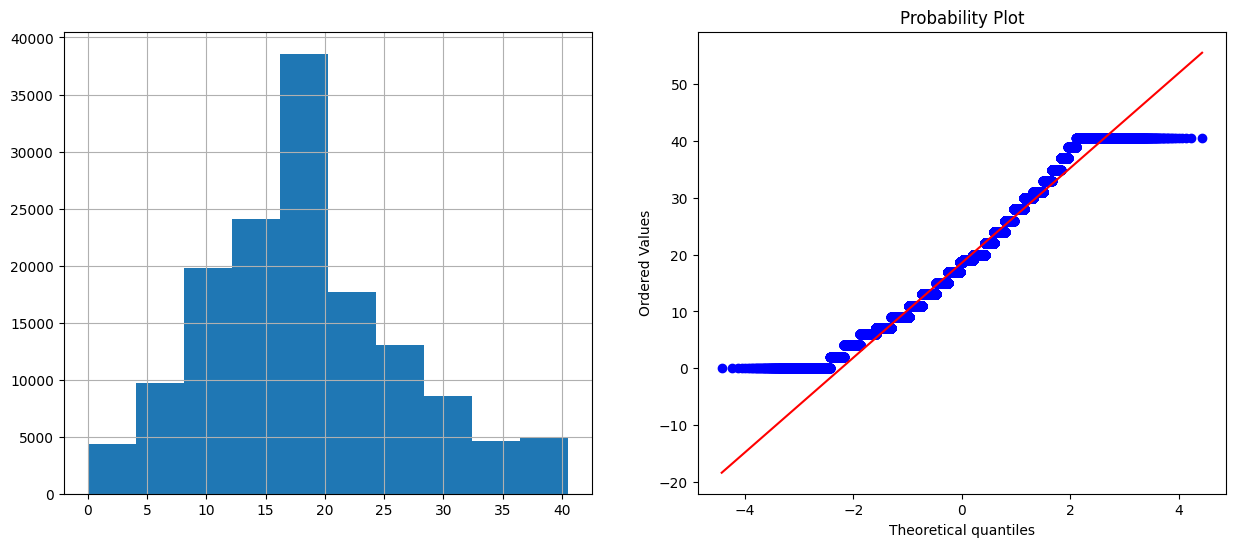

Humidity9am


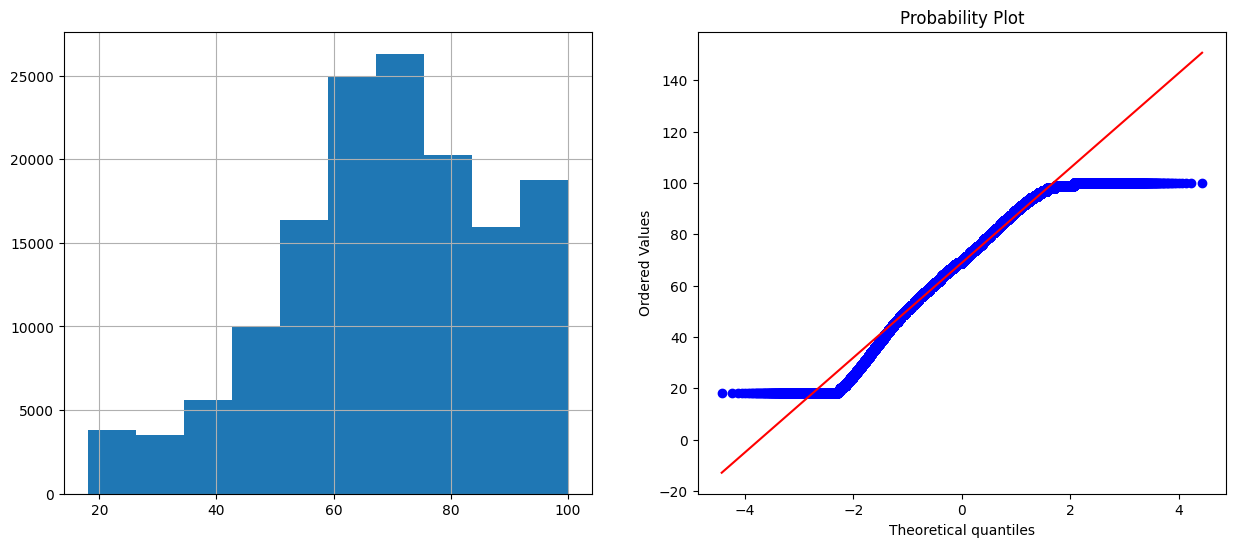

Humidity3pm


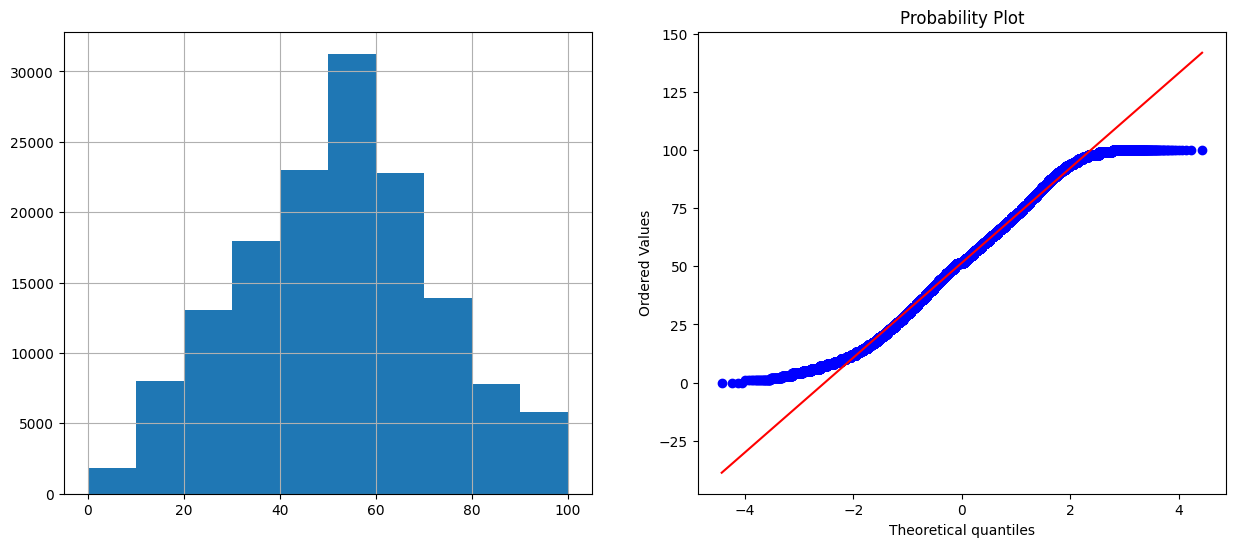

Pressure9am


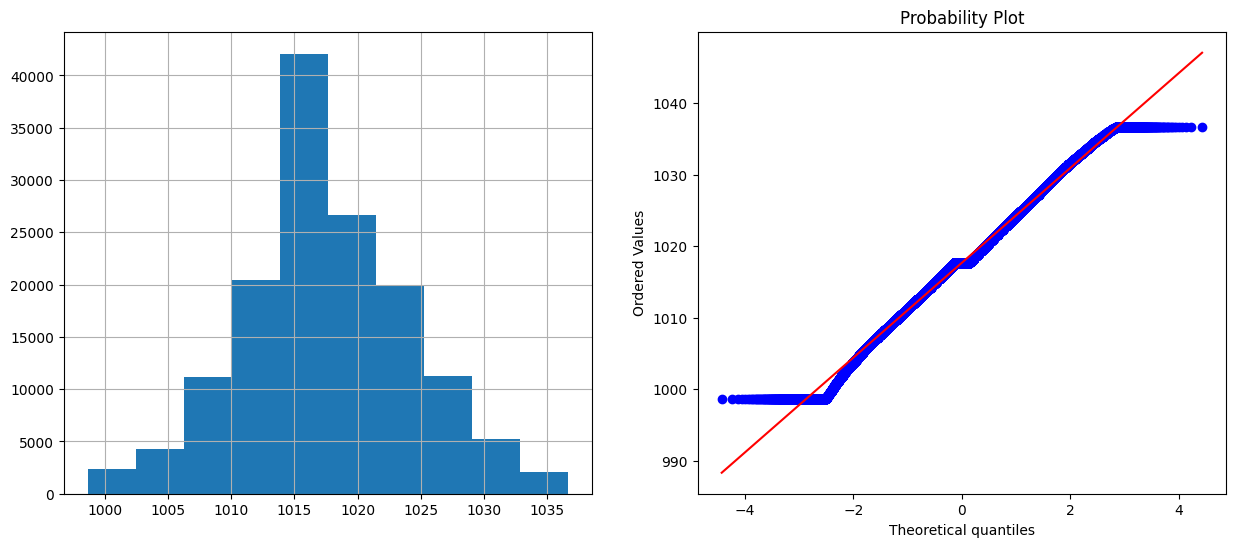

Pressure3pm


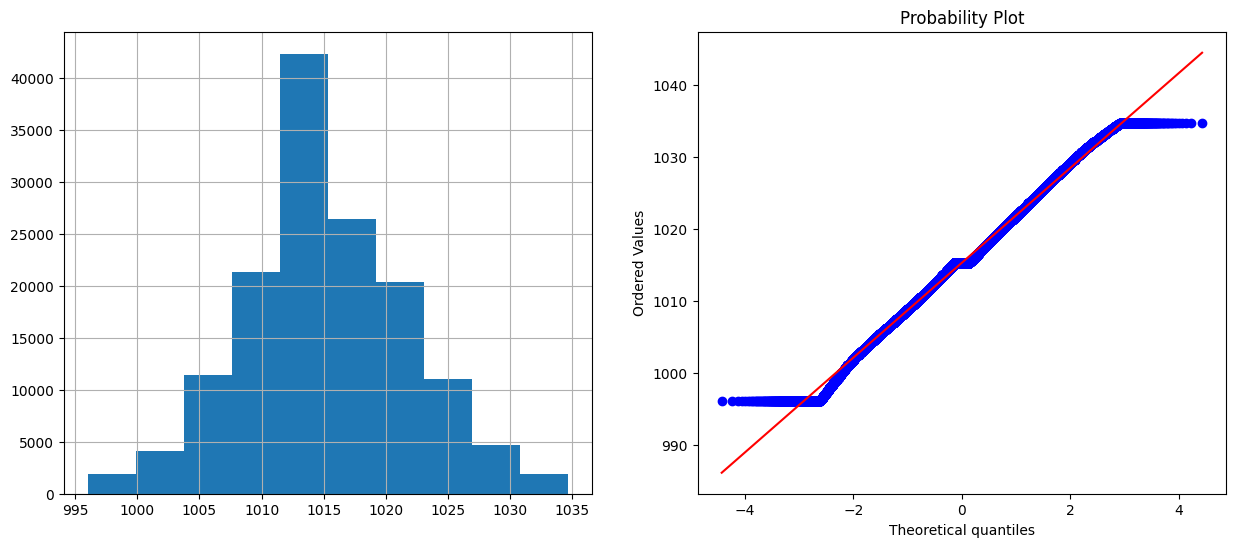

Temp9am


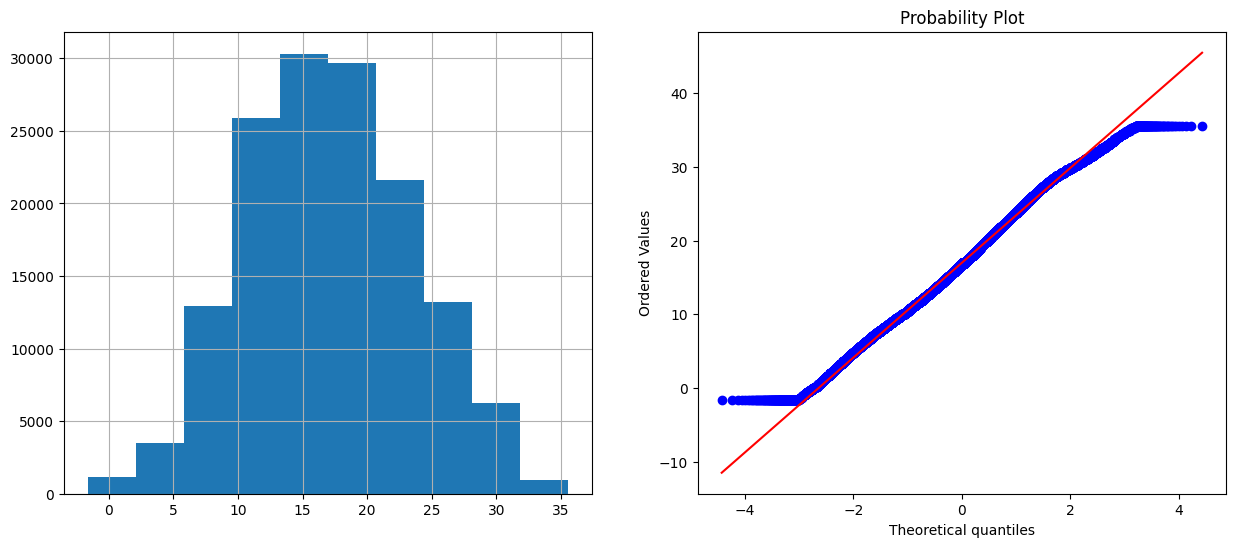

Temp3pm


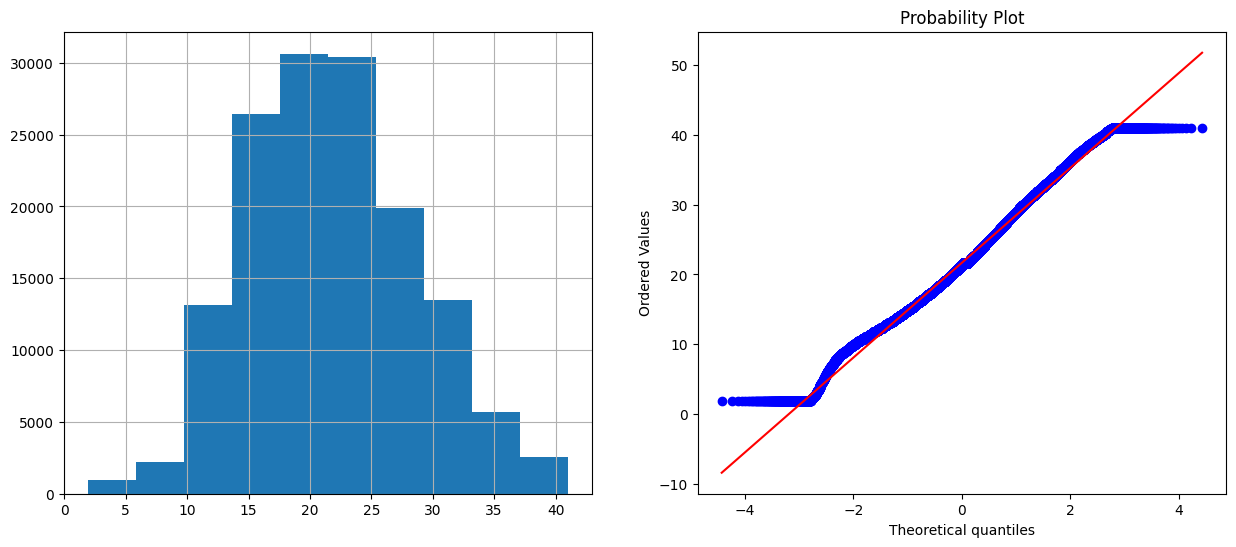

In [72]:
for columns in continuous_feature:
    print(columns)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[columns].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[columns],dist='norm',plot=plt)
    plt.show()

In [74]:
df.to_csv('Preprocesses_result.csv',index=False)